In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
list_files = glob.glob('*.csv')
for file in list_files:
    try:
        globals()[str(file.split('.')[0])] = pd.read_csv(file)
    except:
        pass

In [3]:
list_files

['WNCAATourneySlots.csv',
 'WTeams.csv',
 'WNCAATourneyDetailedResults.csv',
 'WNCAATourneyCompactResults.csv',
 'WSeasons.csv',
 'cities.csv',
 'WRegularSeasonCompactResults.csv',
 'WTeamSpellings.csv',
 'WRegularSeasonDetailedResults.csv',
 'WNCAATourneySeeds.csv',
 'WCities.csv',
 'WGameCities.csv',
 'states.csv']

In [4]:
WCities['Combined'] = WCities.City + "@" + WCities.State
WCities = WCities.set_index('CityID')
WCities.head()

City State        Combined
CityID                                   
4001        Abilene    TX      Abilene@TX
4002          Akron    OH        Akron@OH
4003         Albany    NY       Albany@NY
4004    Albuquerque    NM  Albuquerque@NM
4005      Allentown    PA    Allentown@PA

In [5]:
City_State = dict(WCities['Combined'])

In [6]:
def apply_city(row):
    row['CityID'] = City_State(row['CityID'])

In [7]:
WGameCities['CityID'] = WGameCities['CityID'].apply(lambda val: City_State[val])

In [8]:
WGameCities['City'] = WGameCities['CityID'].apply(lambda val: val.split("@")[0])
WGameCities['State'] = WGameCities['CityID'].apply(lambda val: val.split("@")[1])

In [9]:
WGameCities = WGameCities.drop(labels = 'CityID', axis='columns')

In [10]:
WTeams = WTeams.set_index('TeamID')
teams = dict(WTeams['TeamName'])

In [11]:
WGameCities['LTeamID'] = WGameCities['LTeamID'].apply(lambda team : teams[team])
WGameCities['WTeamID'] = WGameCities['WTeamID'].apply(lambda team : teams[team])

In [12]:
cities['city'] = cities['city'].apply(lambda val: val.lower())
cities = cities[['city', 'state_id', 'lat', 'lng']]

In [13]:
WGameCities['City'] = WGameCities['City'].apply(lambda city: city.lower())
merged = WGameCities.merge(cities, left_on = ['City', 'State'], right_on=['city', 'state_id'])

In [14]:
merged = merged.drop(labels = ['city', 'state_id'], axis = 1)

In [15]:
merged_index = list(merged.index)
original_index = list(WGameCities.index)

In [16]:
merged.head()

Season  DayNum WTeamID        LTeamID   CRType   City State      lat  \
0    2010      11   Akron          IUPUI  Regular  akron    OH  41.0802   
1    2010      30   Akron           IPFW  Regular  akron    OH  41.0802   
2    2010      33   Akron  Youngstown St  Regular  akron    OH  41.0802   
3    2010      56  Temple          Akron  Regular  akron    OH  41.0802   
4    2010      68   Akron        Buffalo  Regular  akron    OH  41.0802   

       lng  
0 -81.5219  
1 -81.5219  
2 -81.5219  
3 -81.5219  
4 -81.5219

In [17]:
os.environ['PROJ_LIB'] = '/anaconda3/share/proj'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [18]:
from sklearn.preprocessing import LabelEncoder

def create_map(lats, longs, color = None, title = None, size = None):
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,
                rsphere=(6378137.00,6356752.3142),\
                resolution='h',area_thresh=1000.,projection='lcc',\
                lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    
    if color is not None:
        le = LabelEncoder()
        color = le.fit_transform(color)
        
    m.drawcoastlines(color='gray', zorder=0)
    m.drawcountries(color='gray', zorder= -1)
    m.drawstates(color='gray', zorder= -1)
    
    
    
    x, y = m(longs, lats)
    
    if color is not None:
        if size is not None:
            m.scatter(x, y, c = color, s = size)
            return 
        
        else:
            m.scatter(x, y, c = color)
            return 
        
    m.scatter(x, y, c = color)
    
    if title is not None:
        plt.title(title)
        print(title)
        plt.savefig(title+'.jpg', dpi = 500)

    

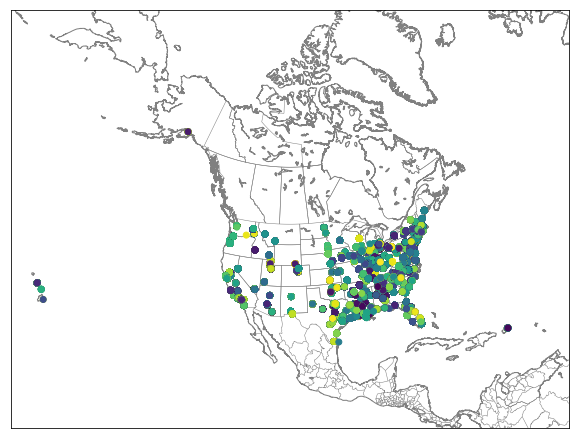

In [45]:
m = create_map(longs = merged['lng'].values, lats = merged['lat'].values, color = merged['WTeamID'])

In [18]:
groups = merged.groupby(by = ['City', 'State'])

In [19]:
list_indices = []
for df in groups:
    list_indices += [df[0]]

In [20]:
grouped_by_winning = merged.groupby('WTeamID')

In [21]:
keys = merged.WTeamID.unique()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


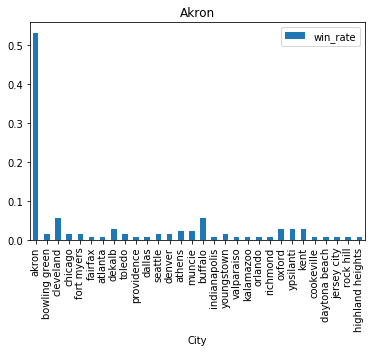

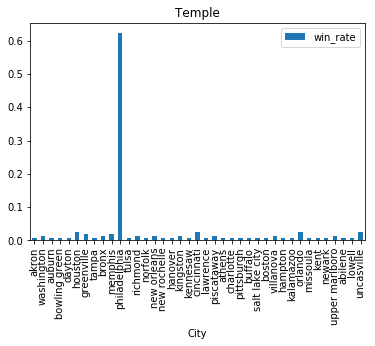

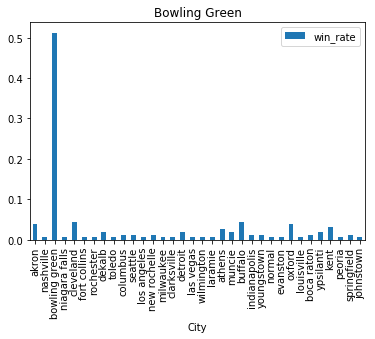

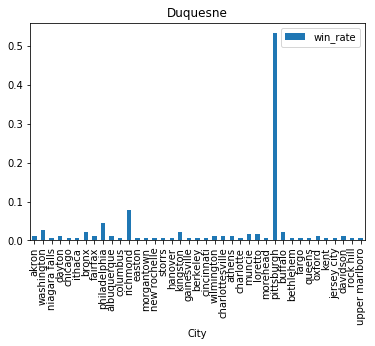

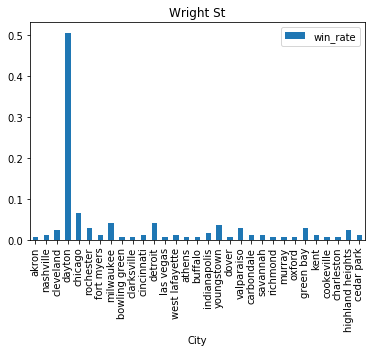

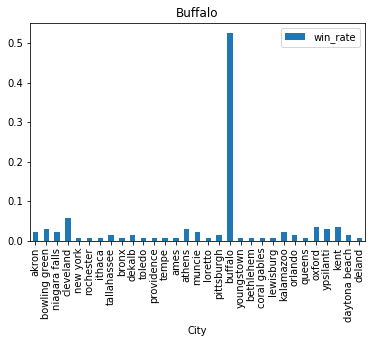

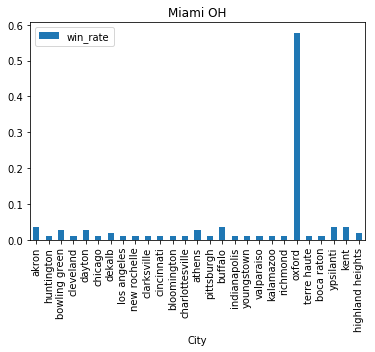

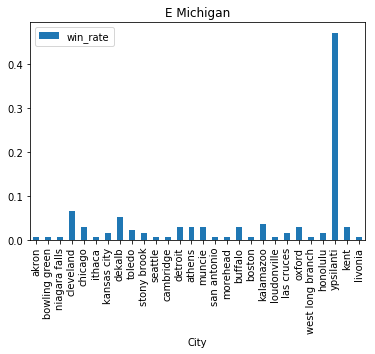

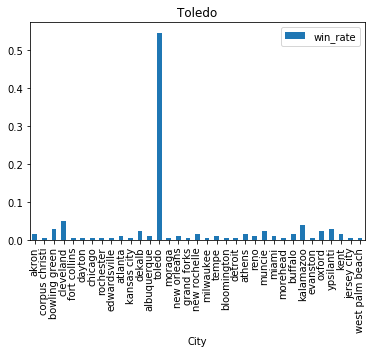

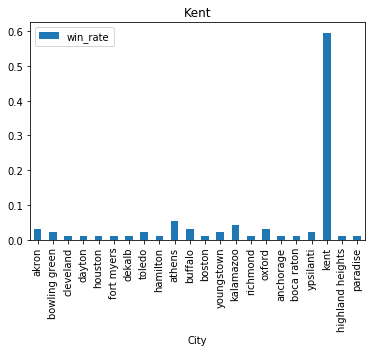

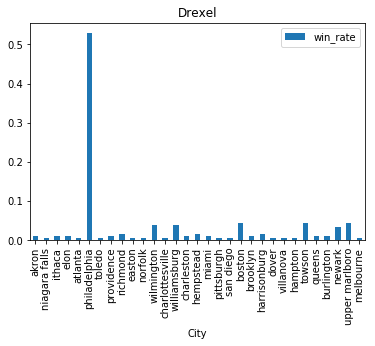

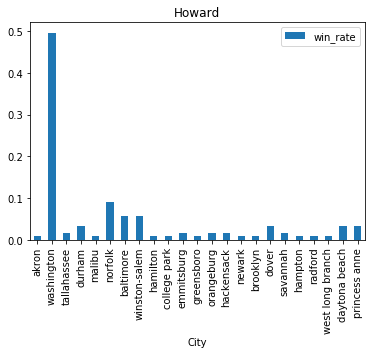

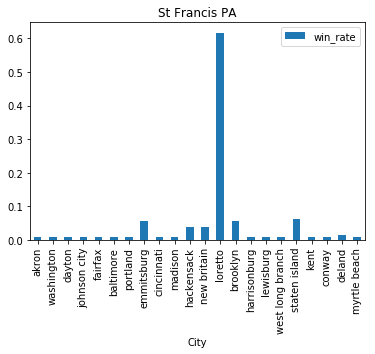

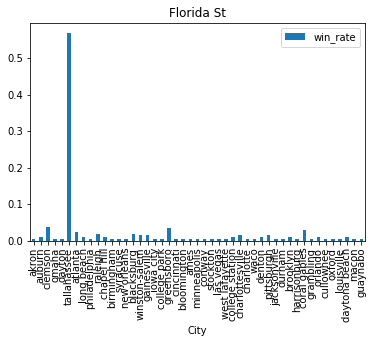

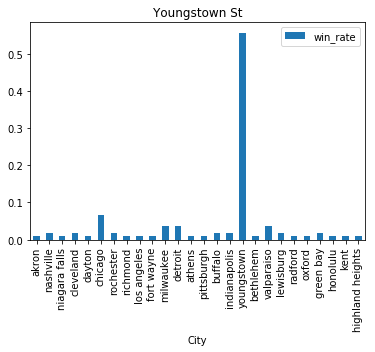

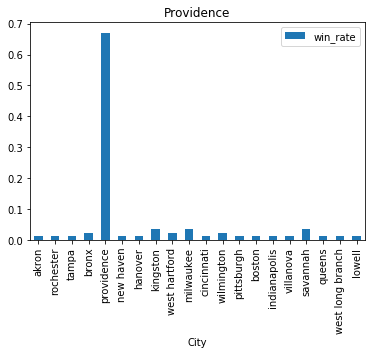

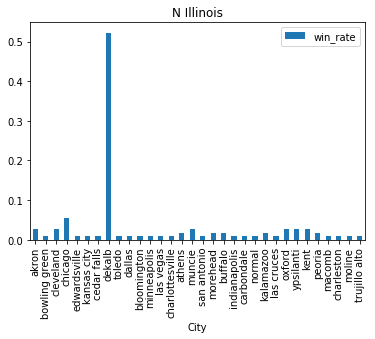

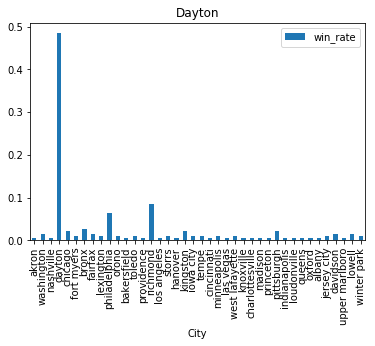

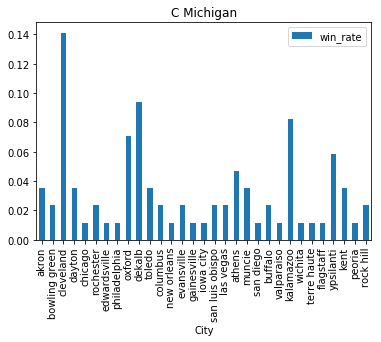

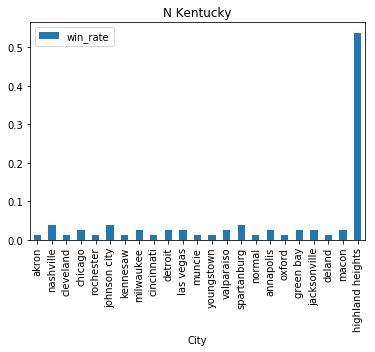

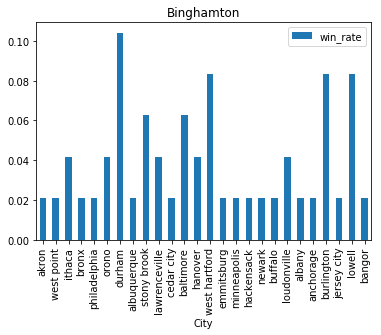

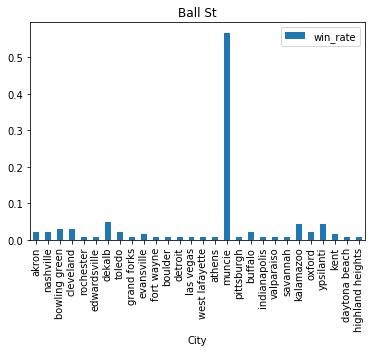

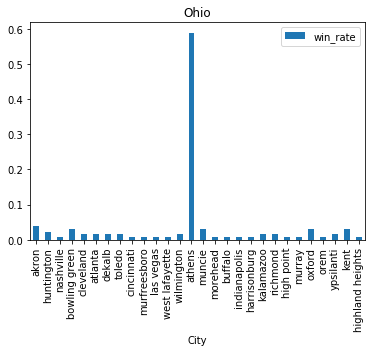

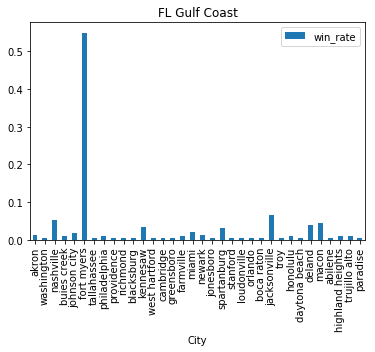

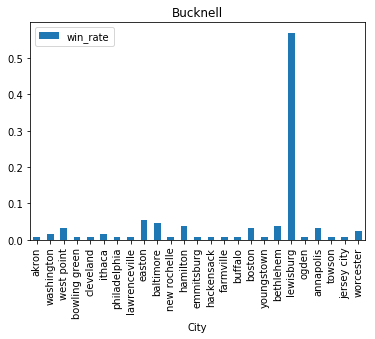

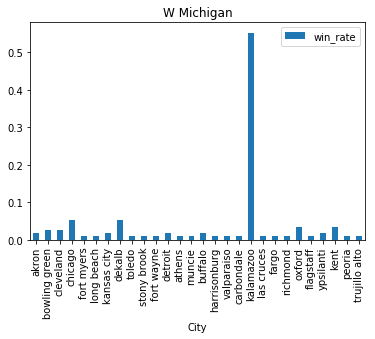

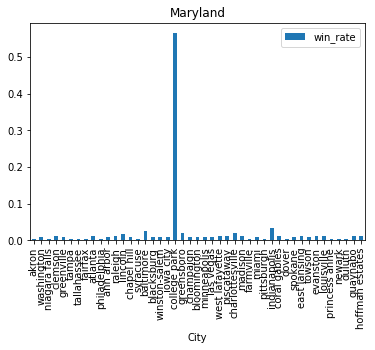

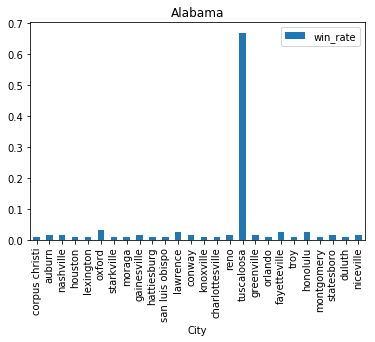

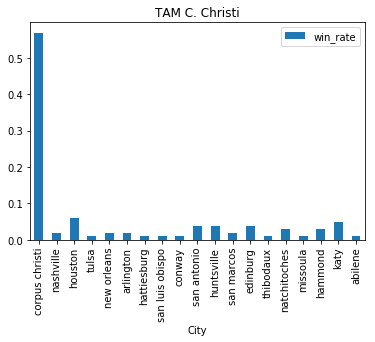

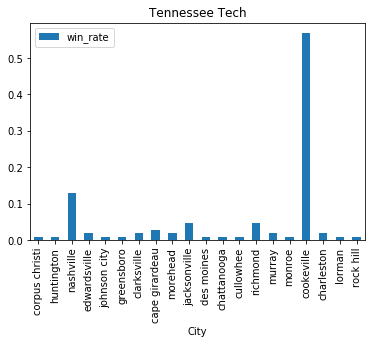

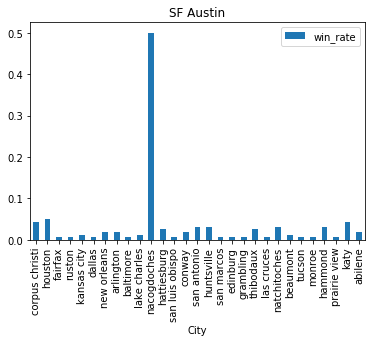

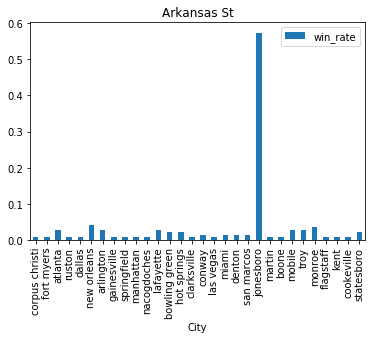

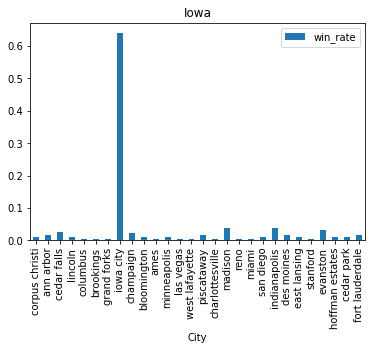

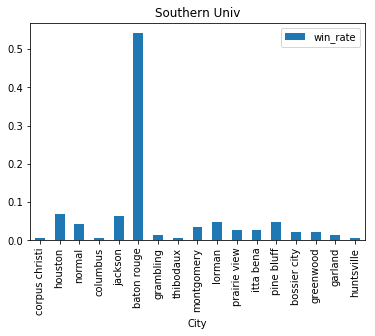

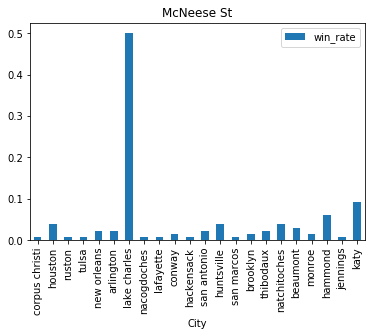

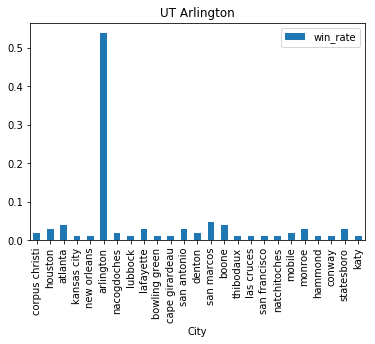

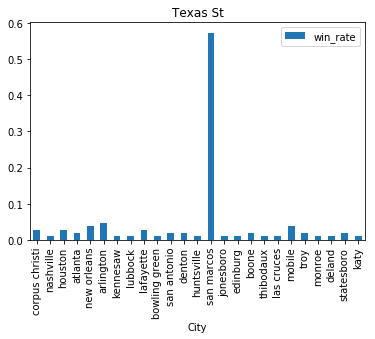

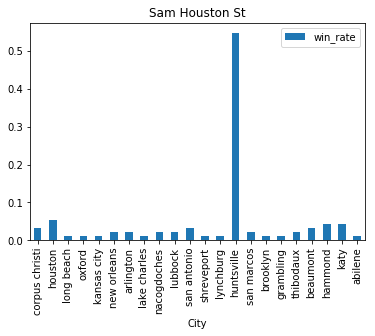

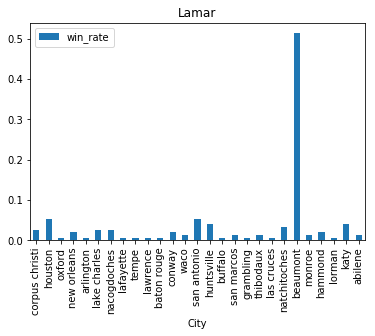

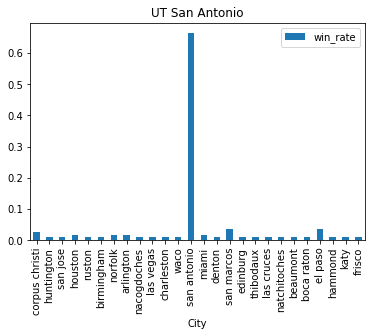

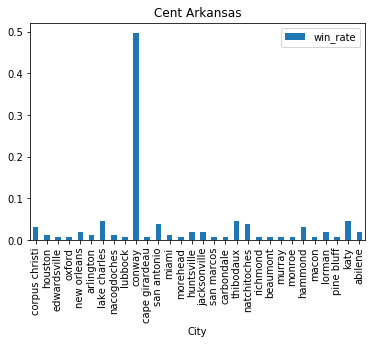

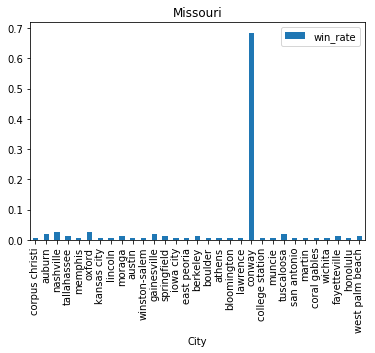

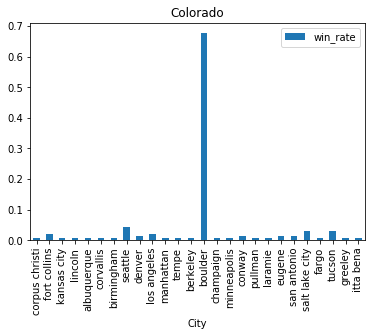

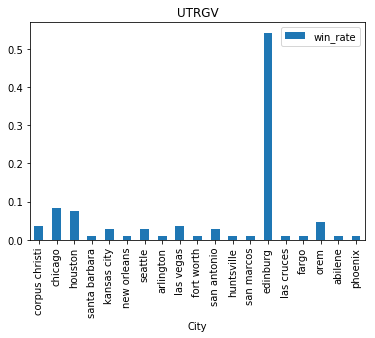

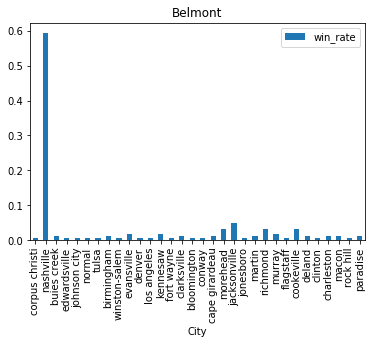

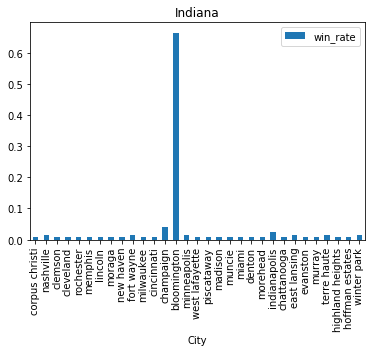

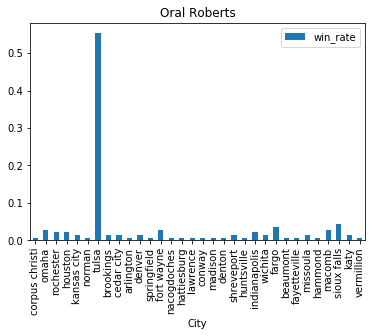

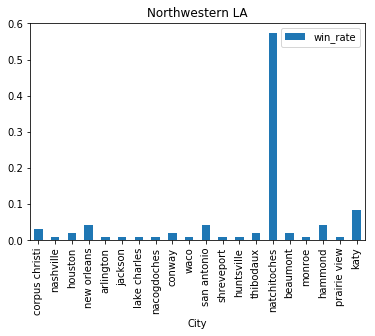

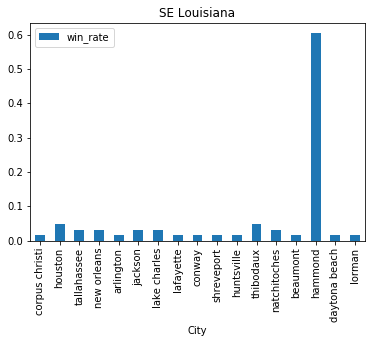

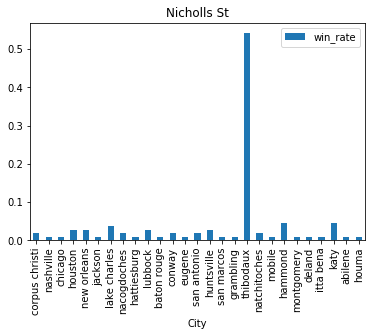

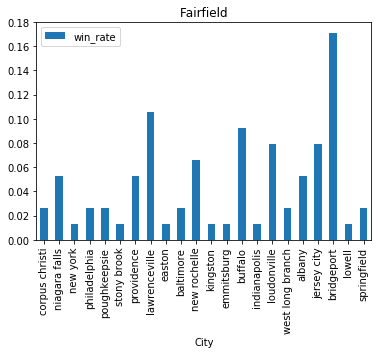

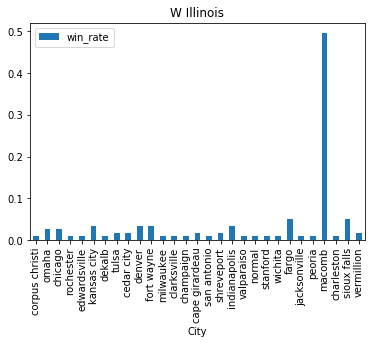

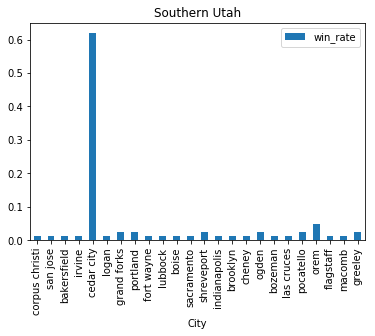

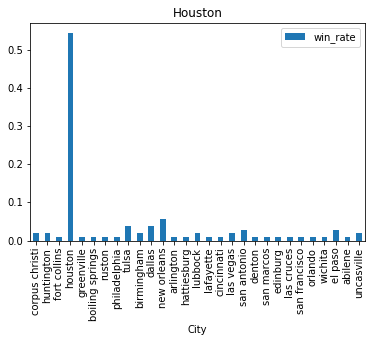

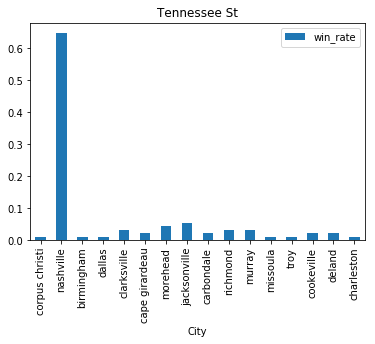

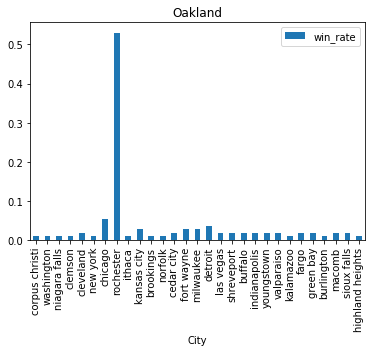

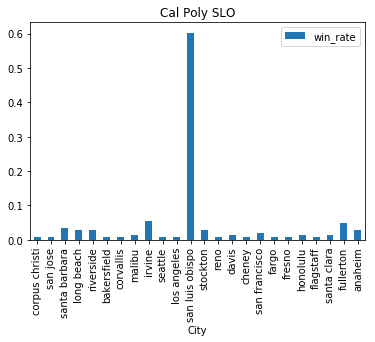

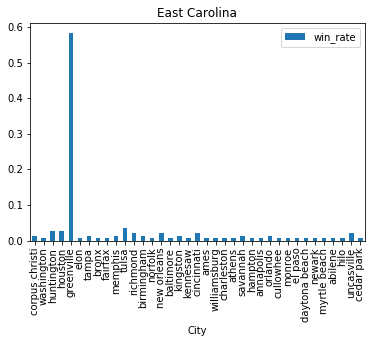

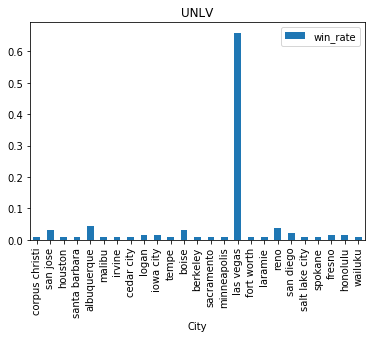

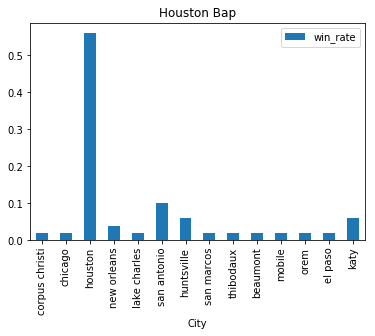

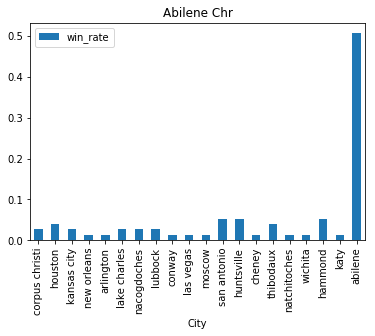

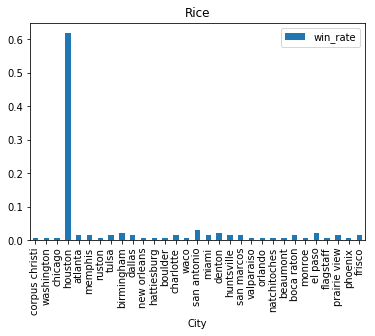

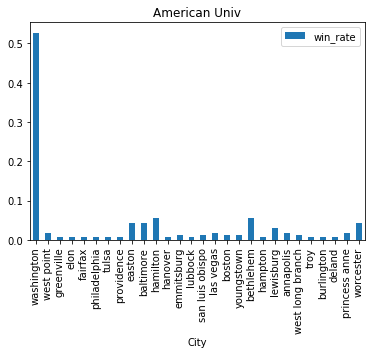

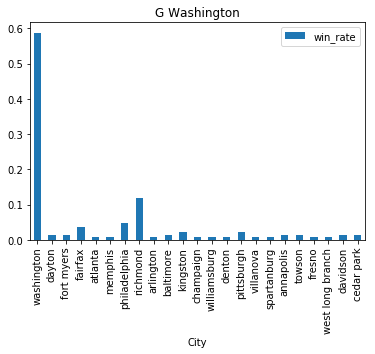

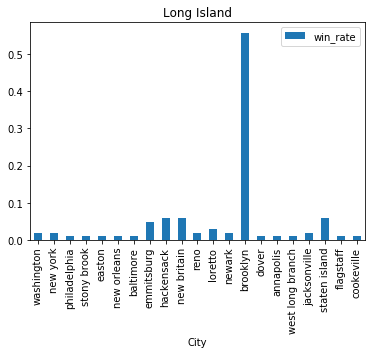

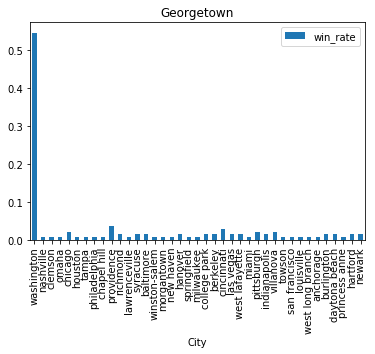

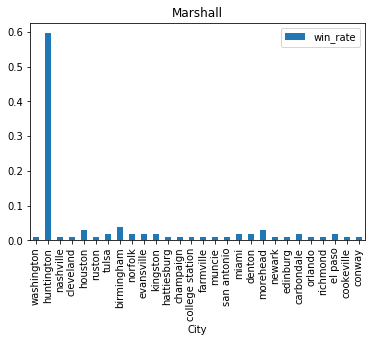

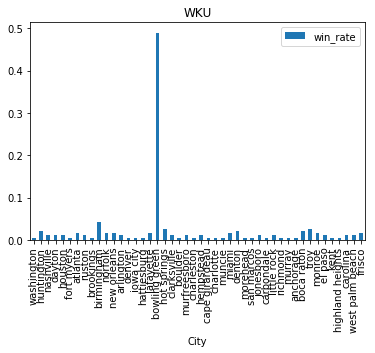

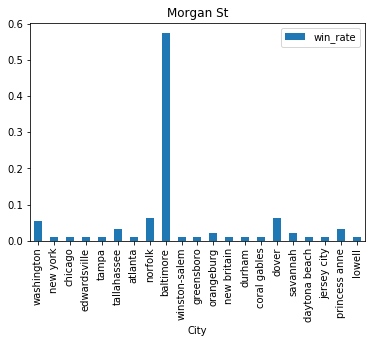

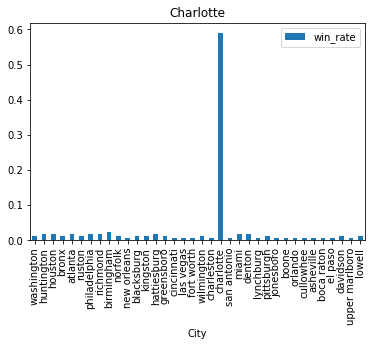

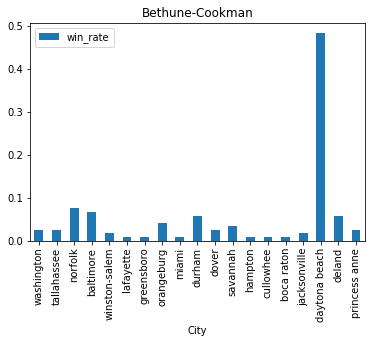

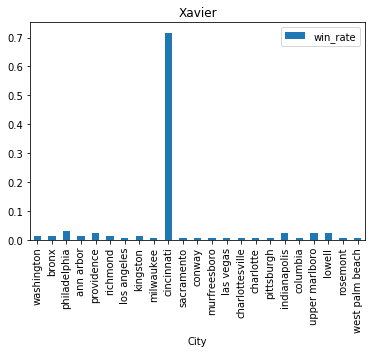

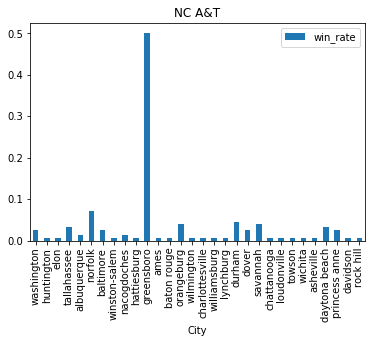

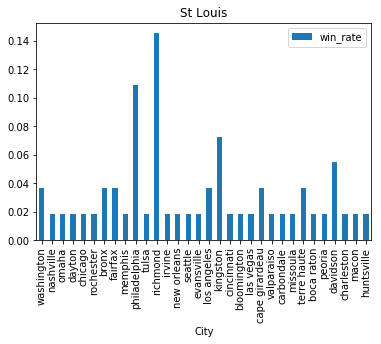

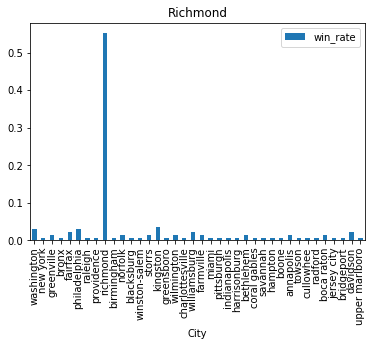

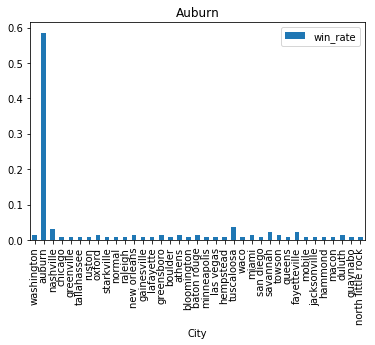

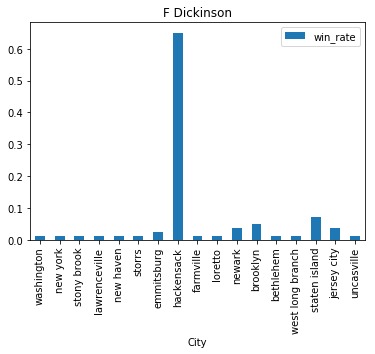

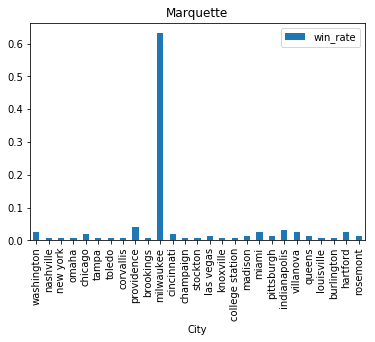

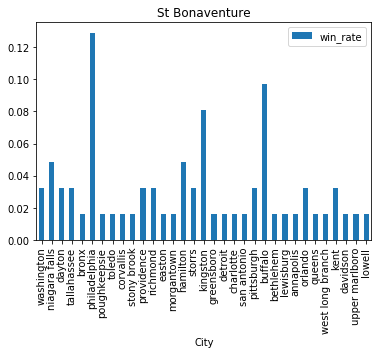

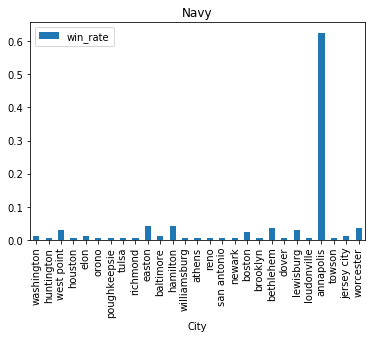

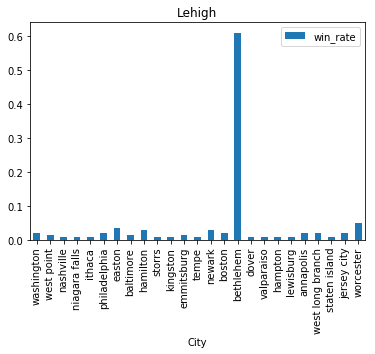

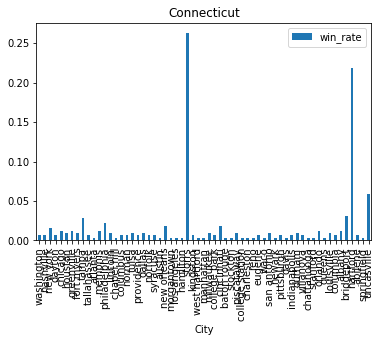

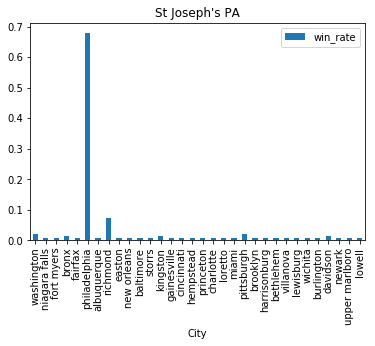

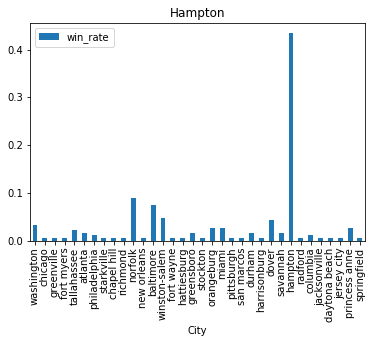

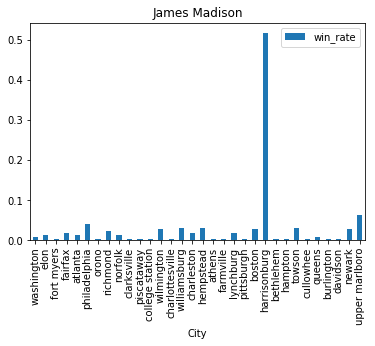

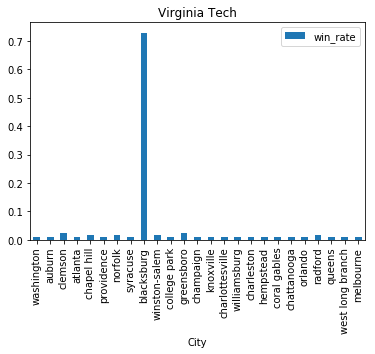

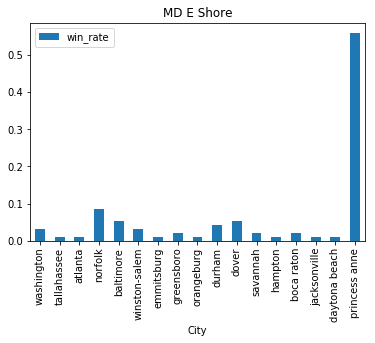

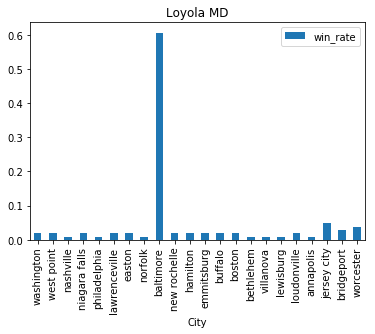

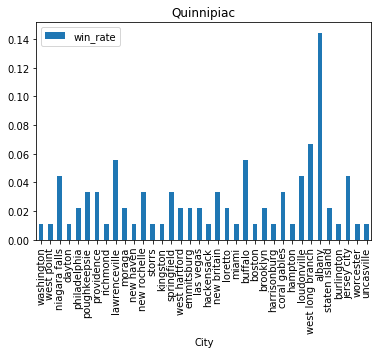

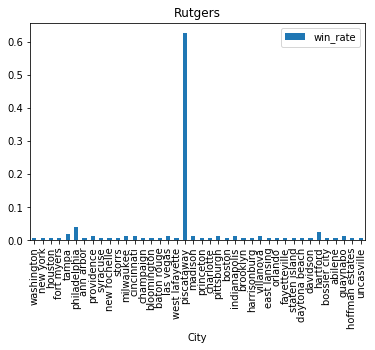

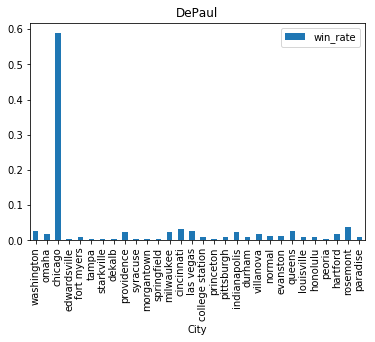

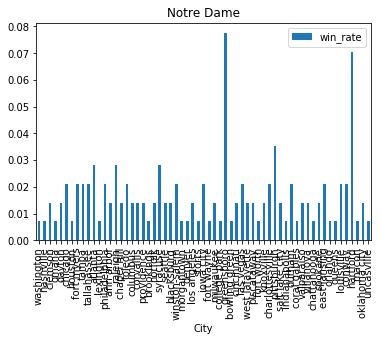

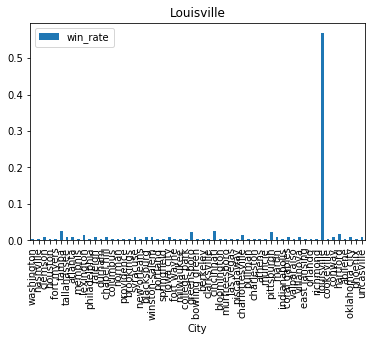

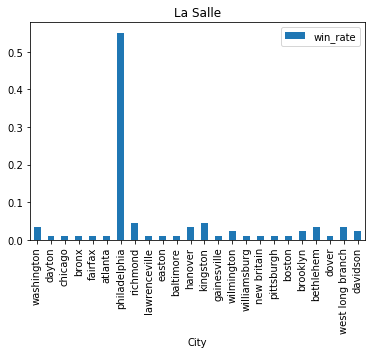

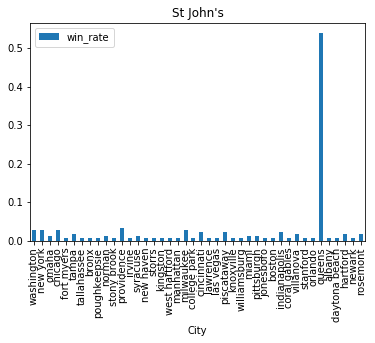

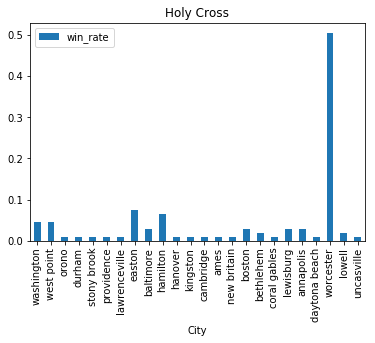

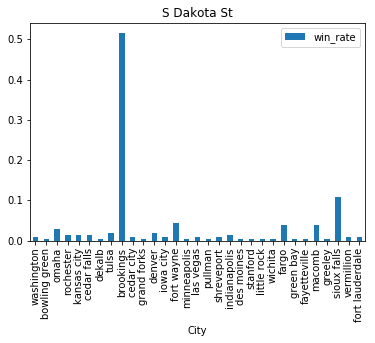

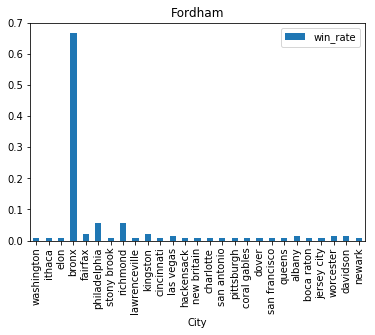

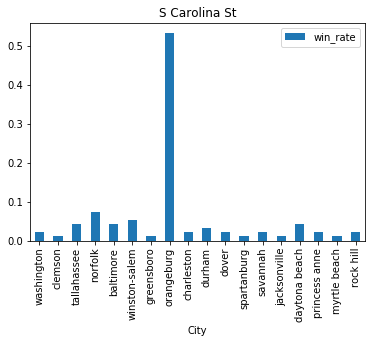

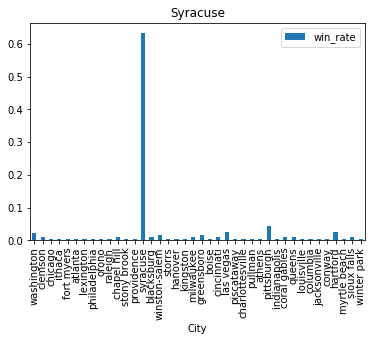

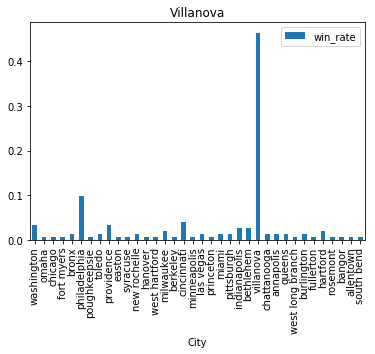

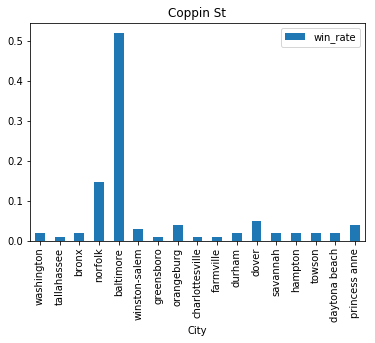

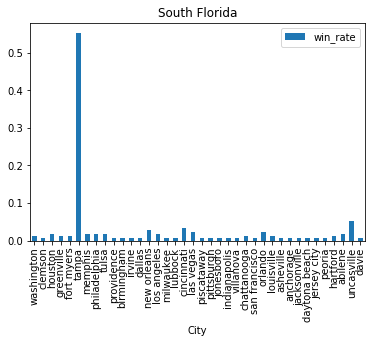

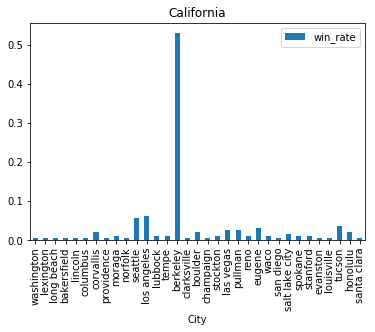

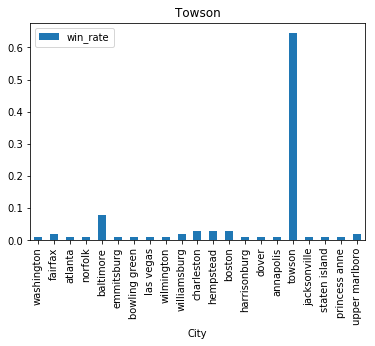

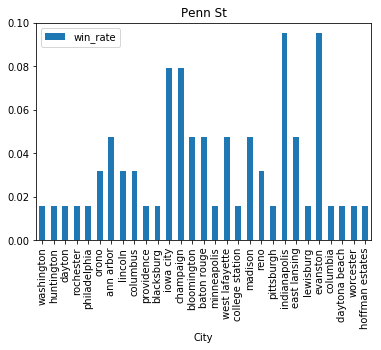

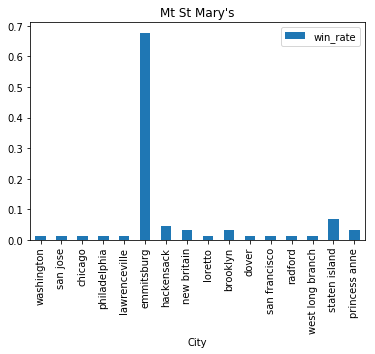

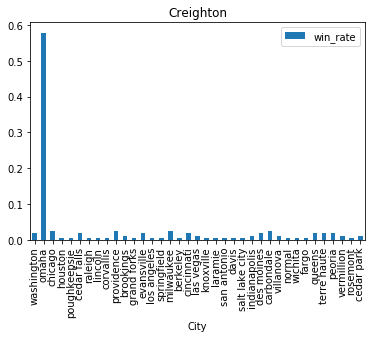

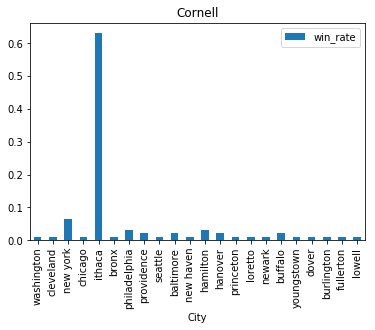

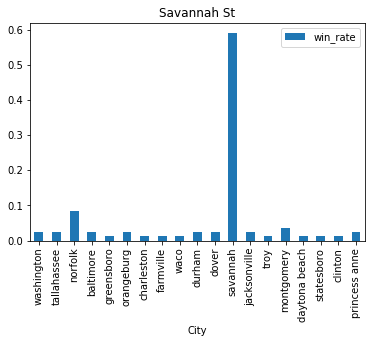

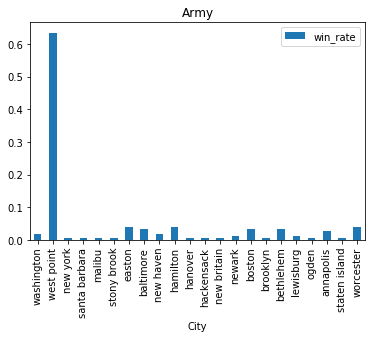

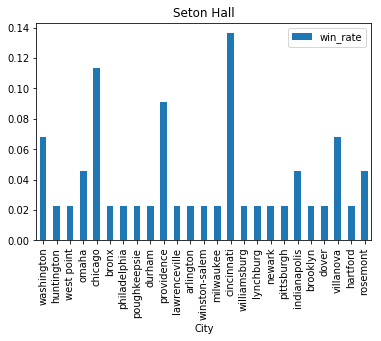

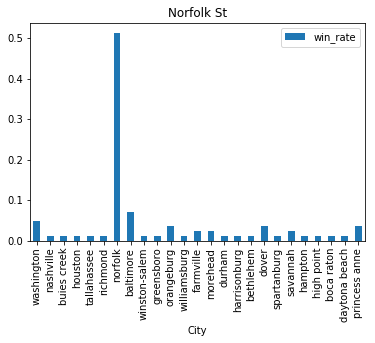

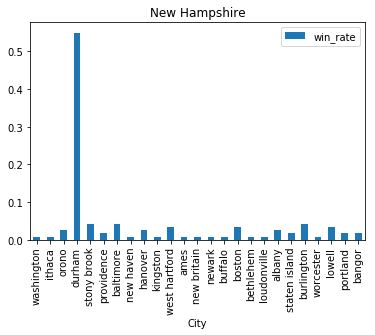

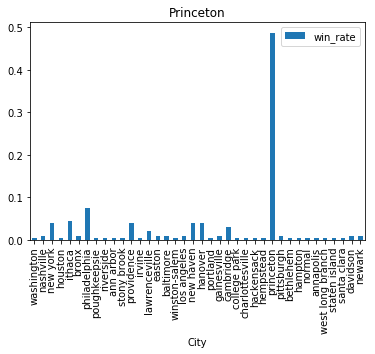

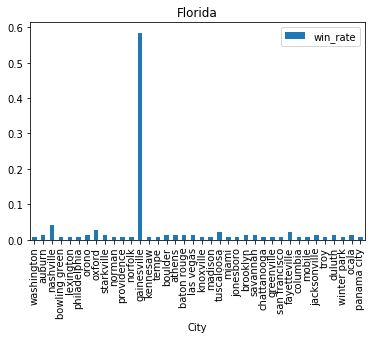

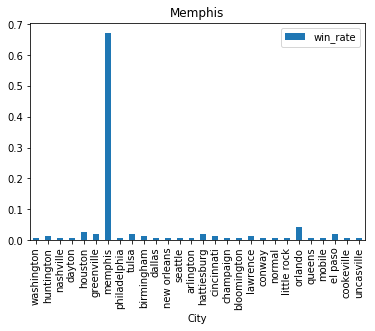

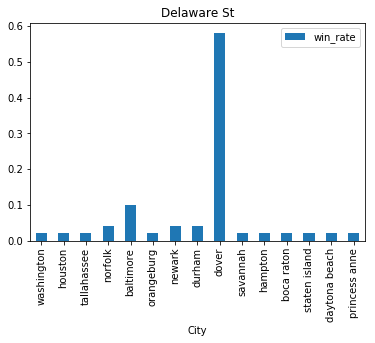

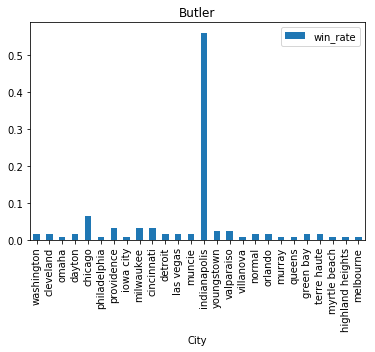

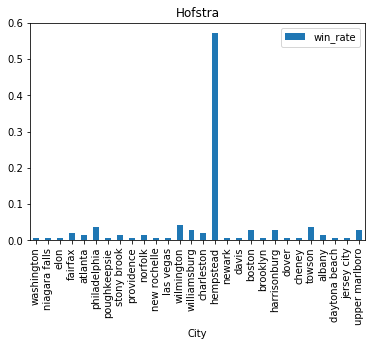

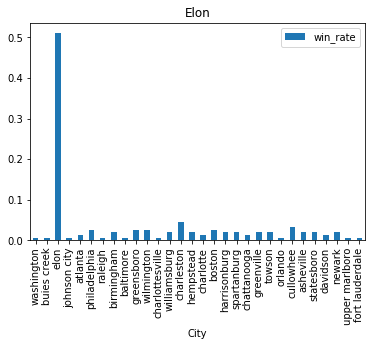

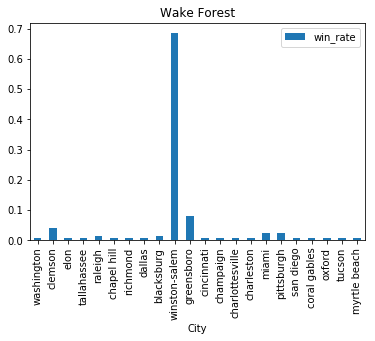

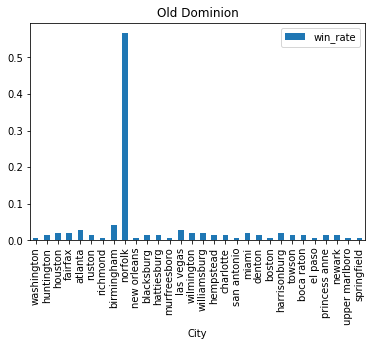

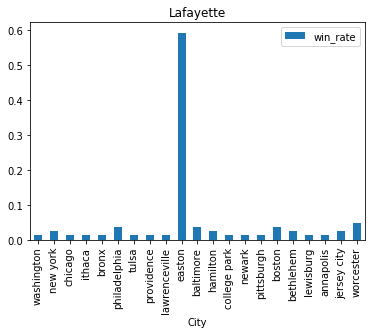

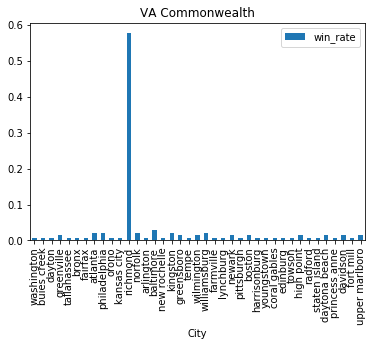

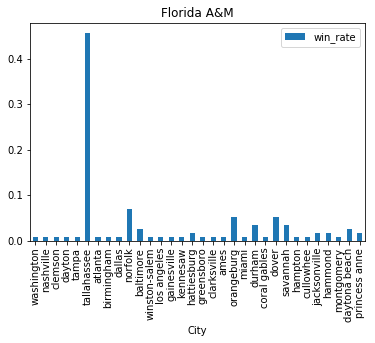

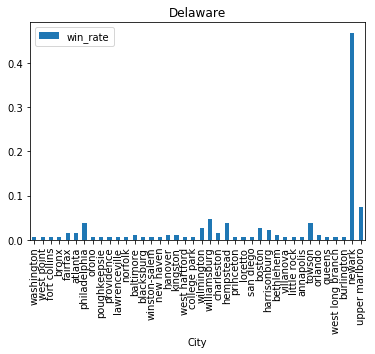

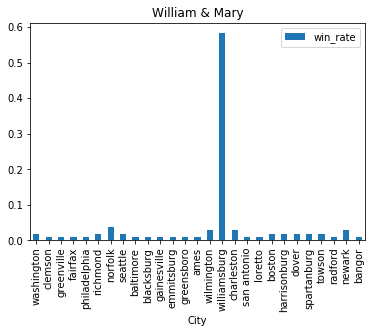

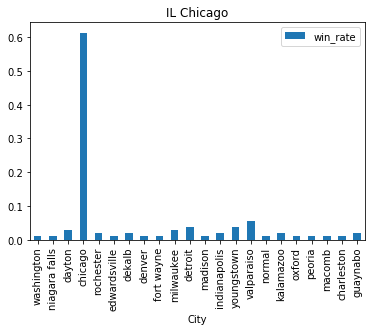

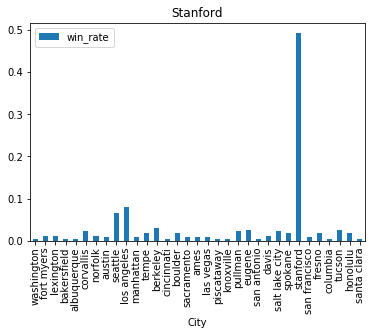

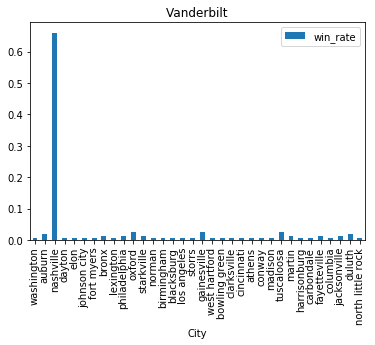

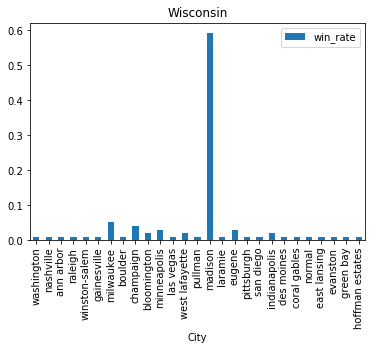

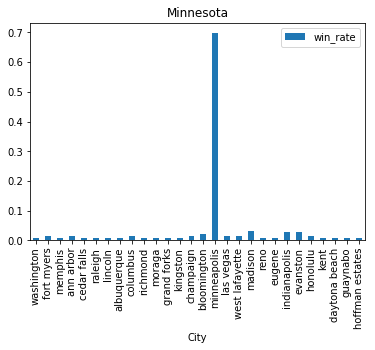

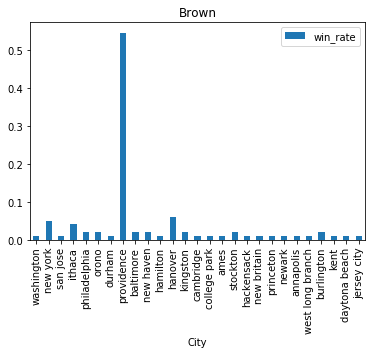

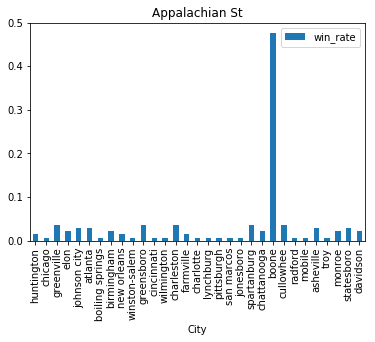

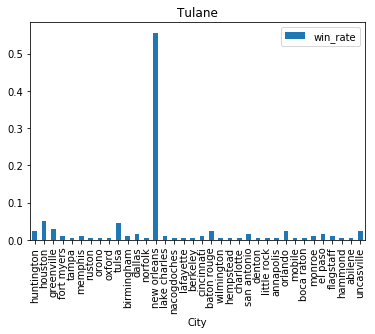

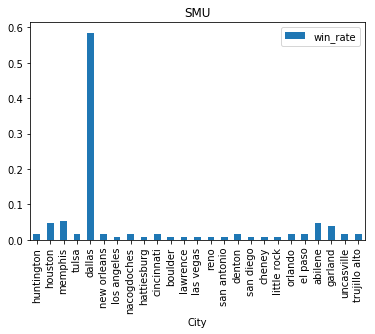

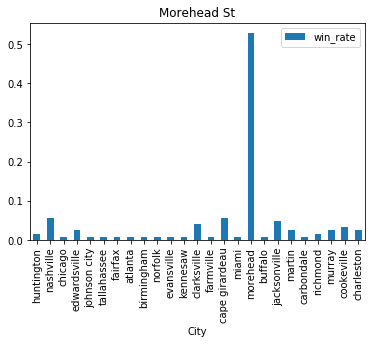

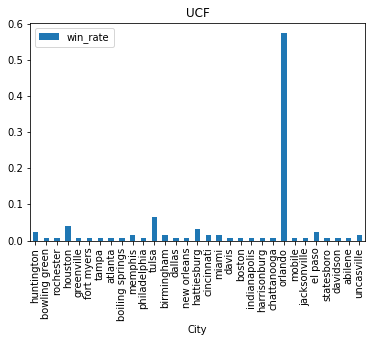

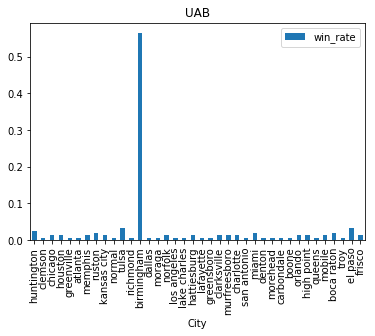

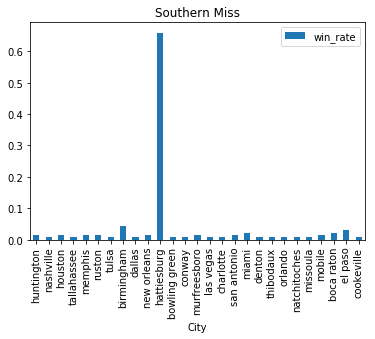

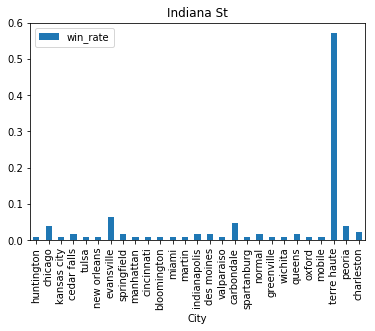

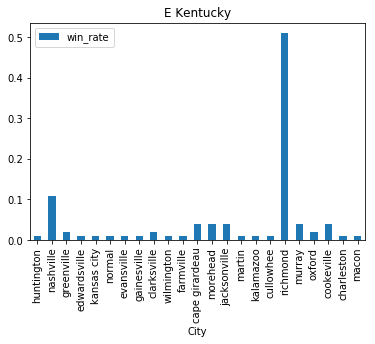

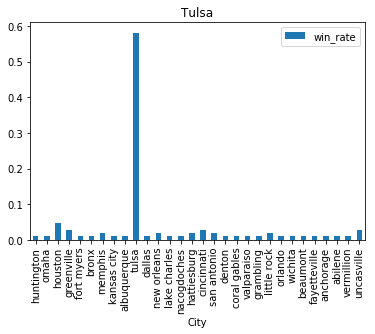

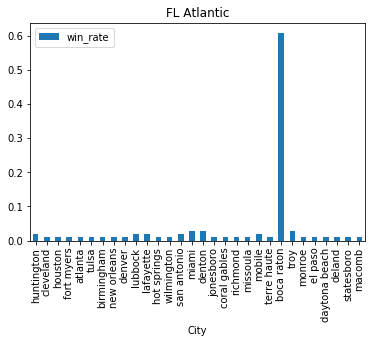

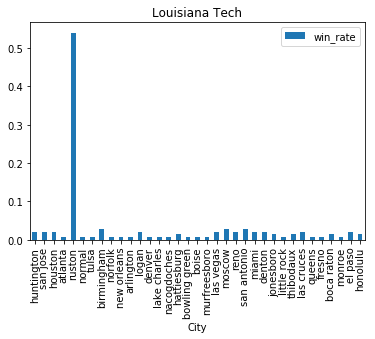

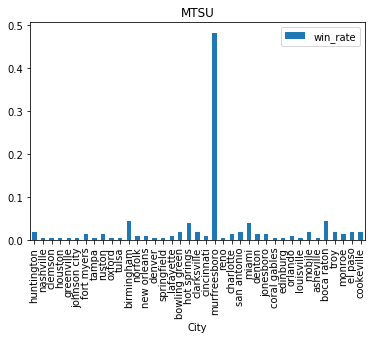

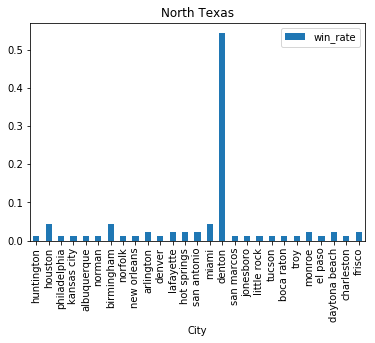

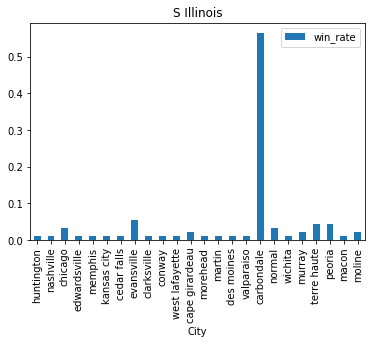

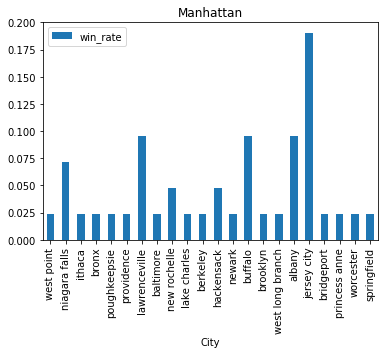

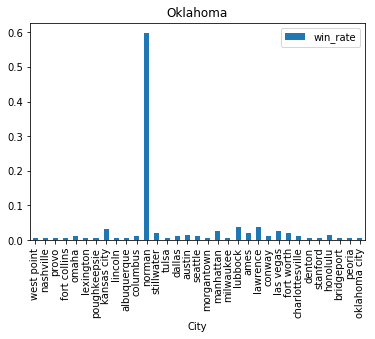

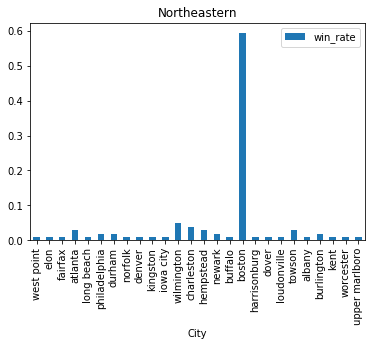

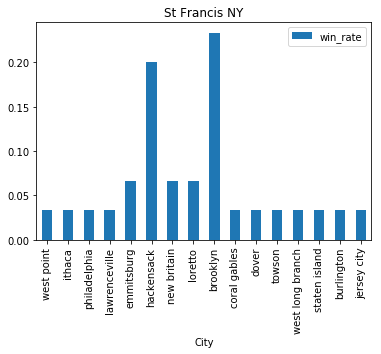

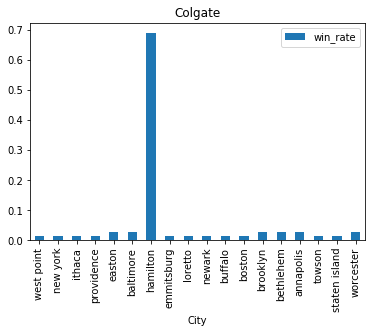

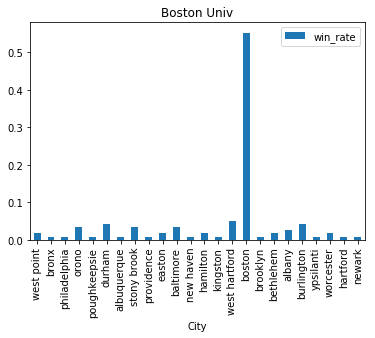

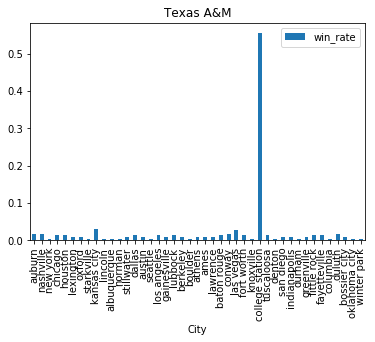

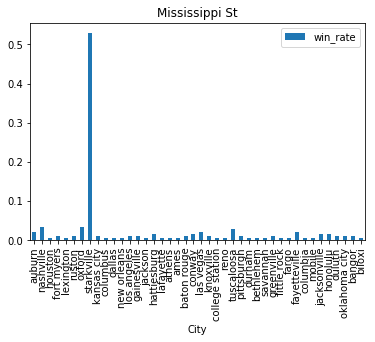

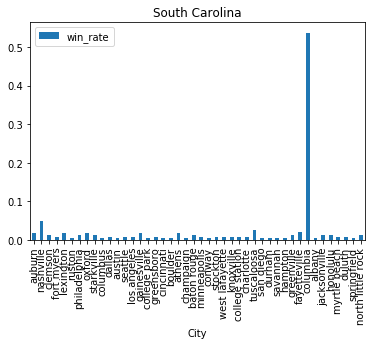

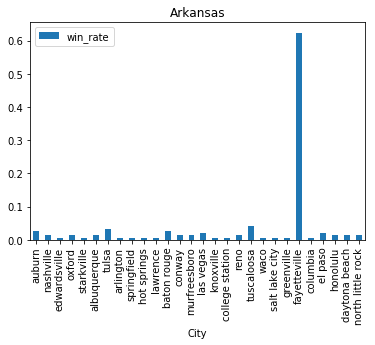

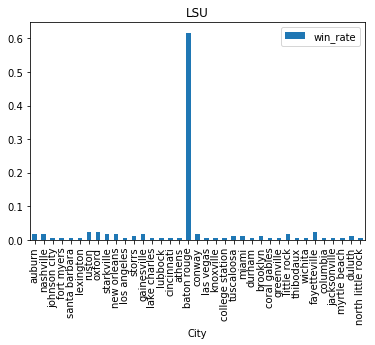

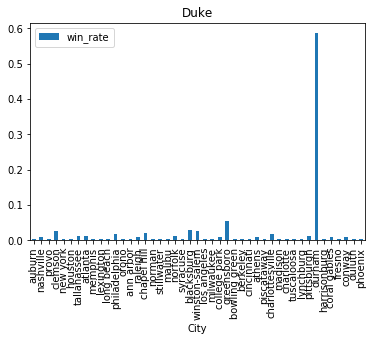

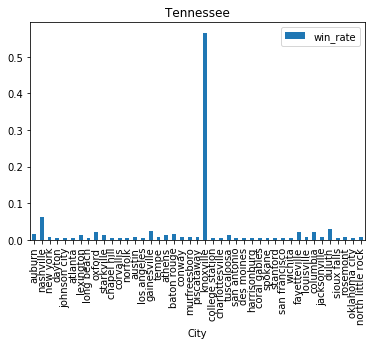

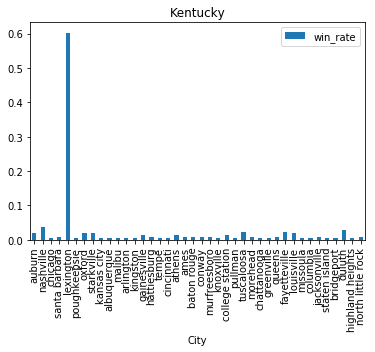

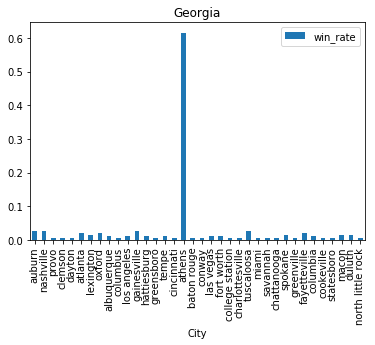

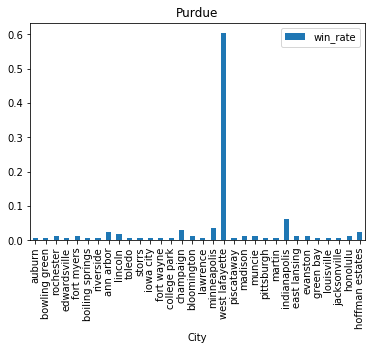

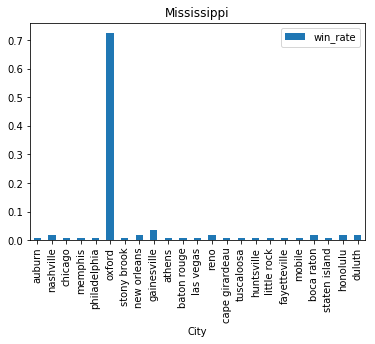

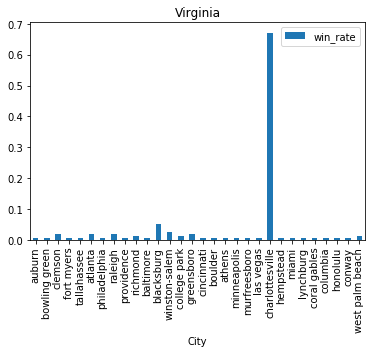

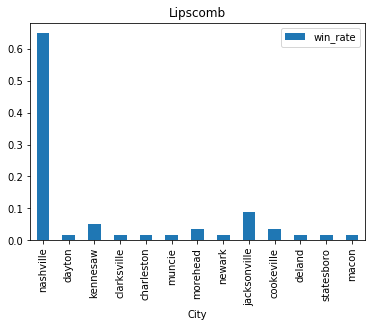

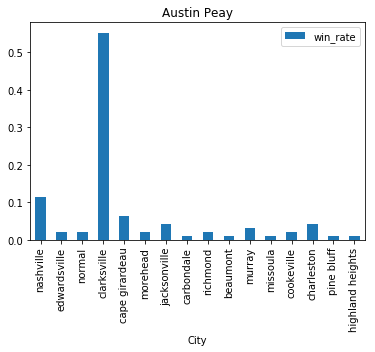

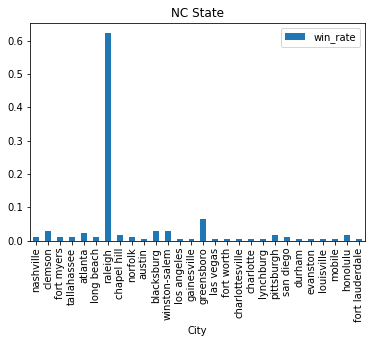

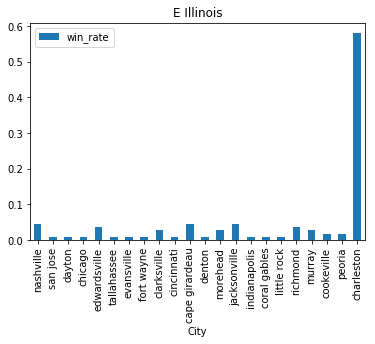

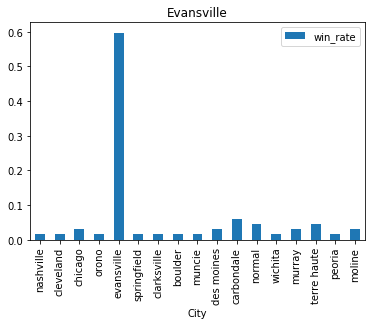

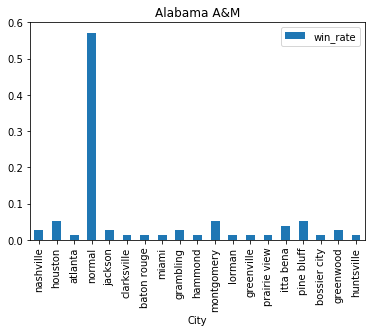

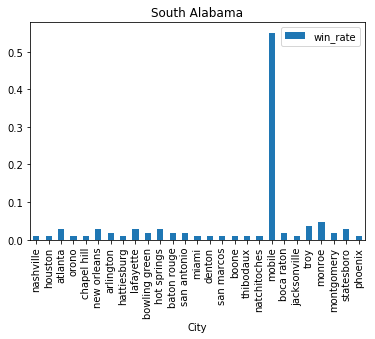

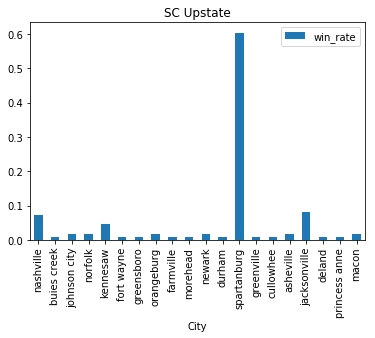

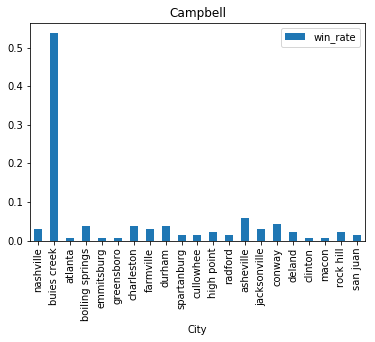

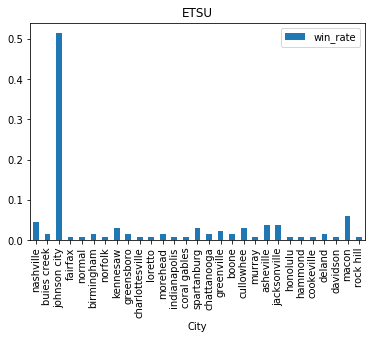

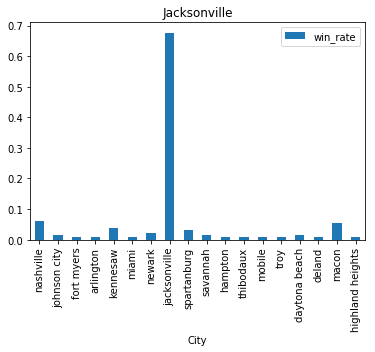

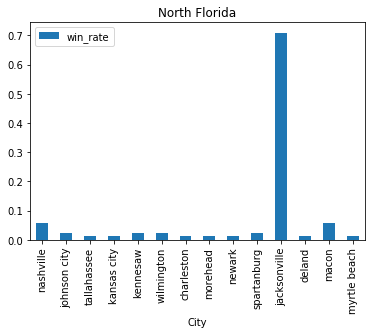

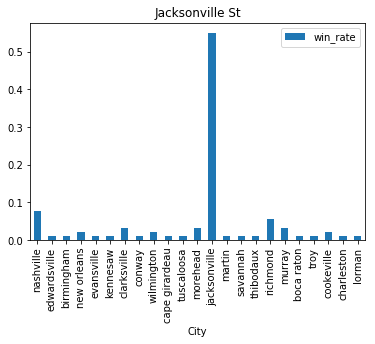

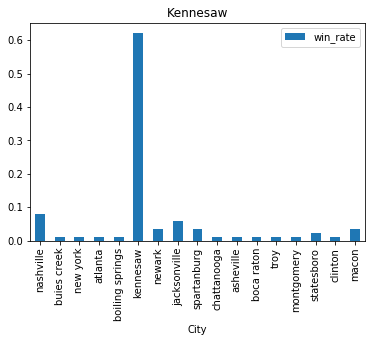

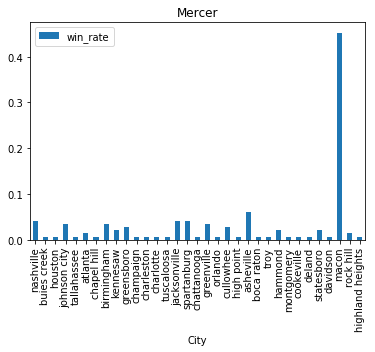

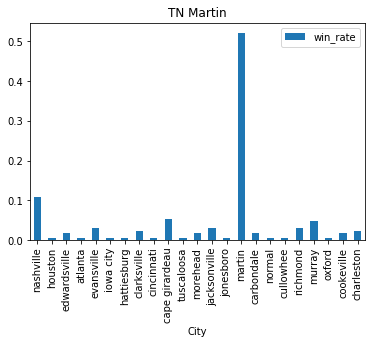

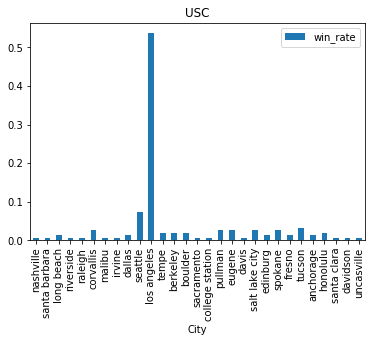

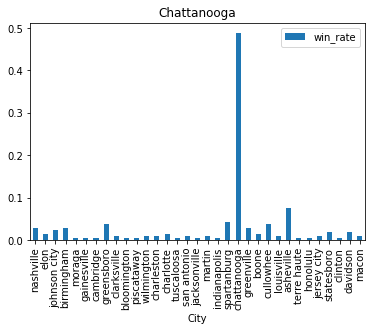

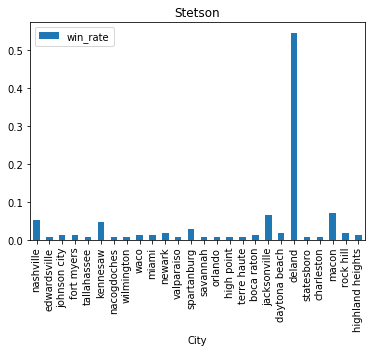

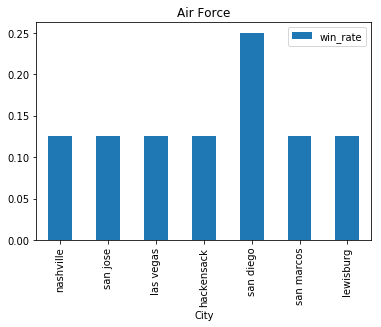

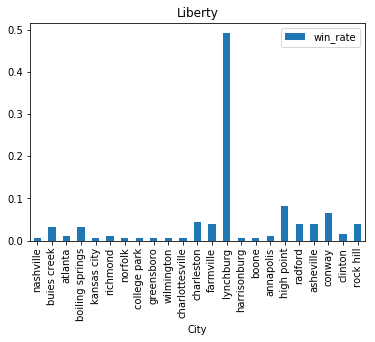

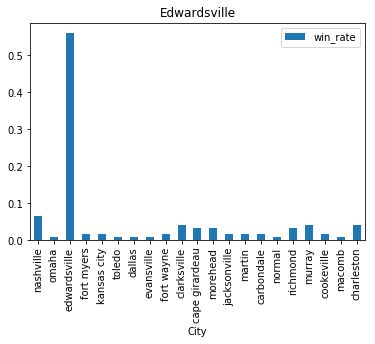

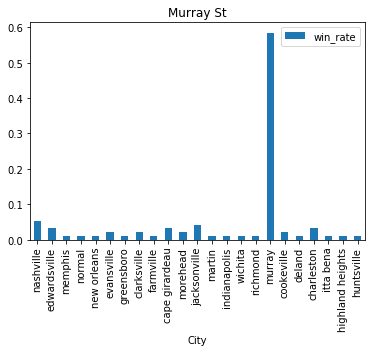

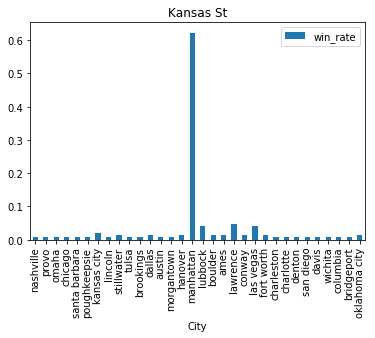

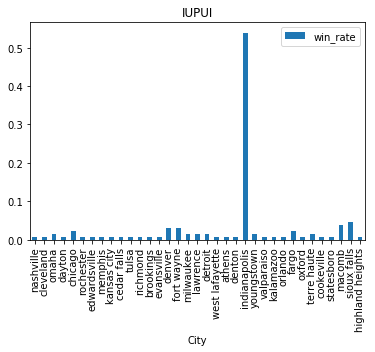

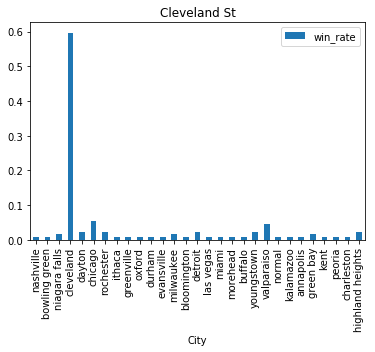

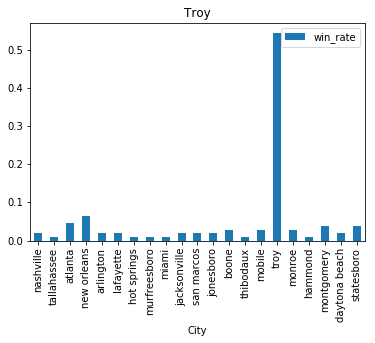

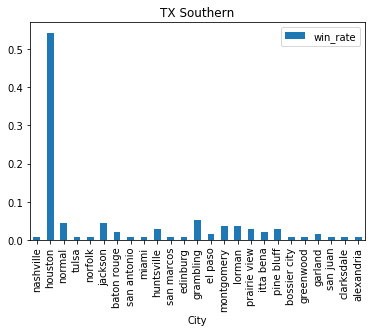

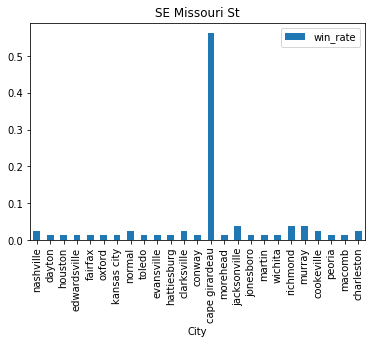

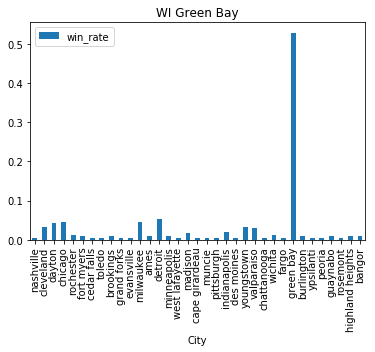

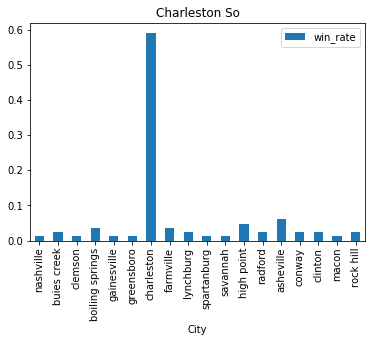

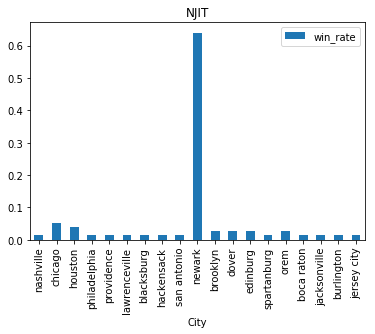

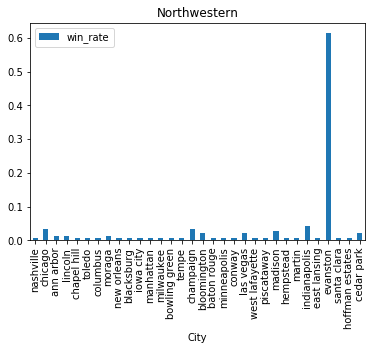

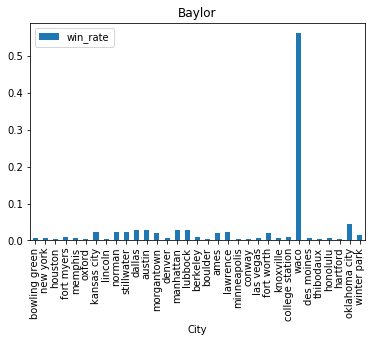

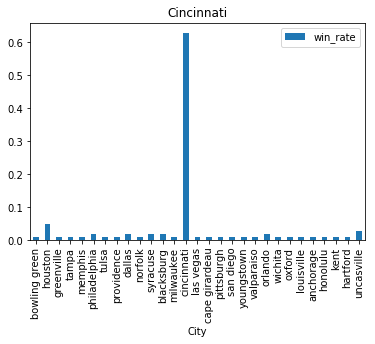

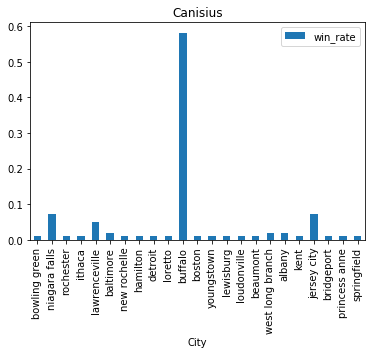

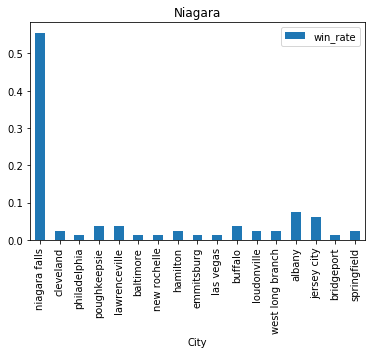

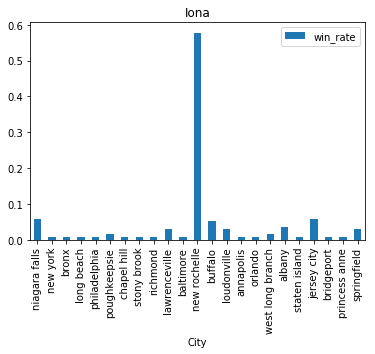

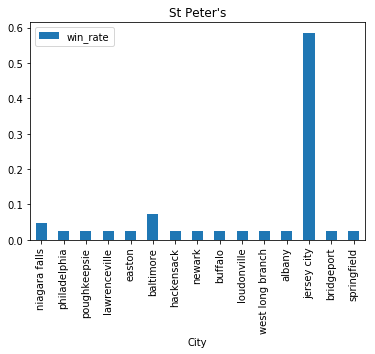

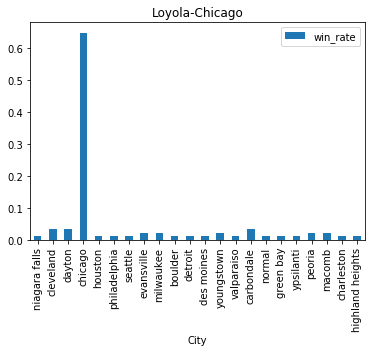

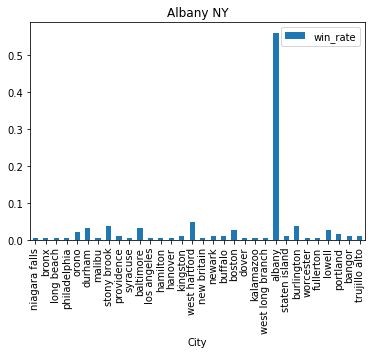

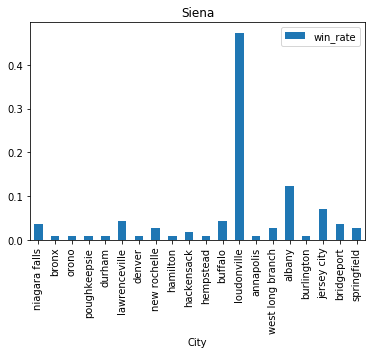

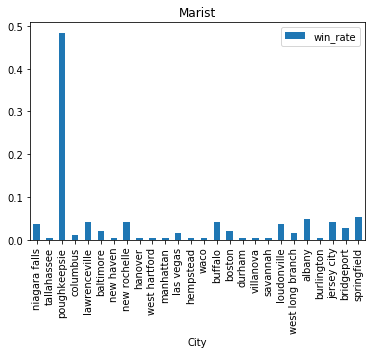

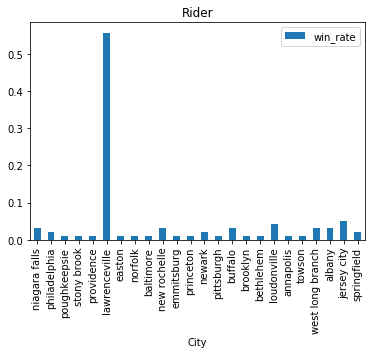

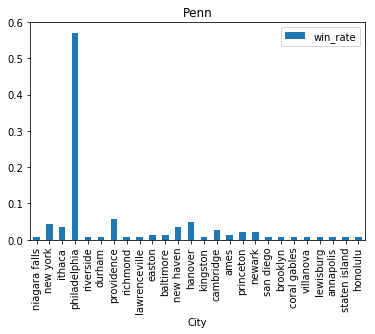

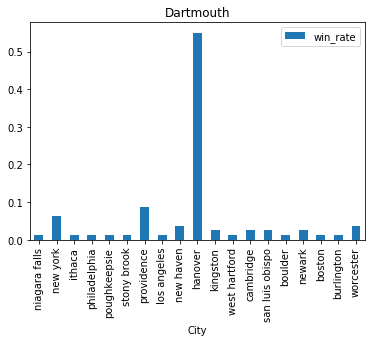

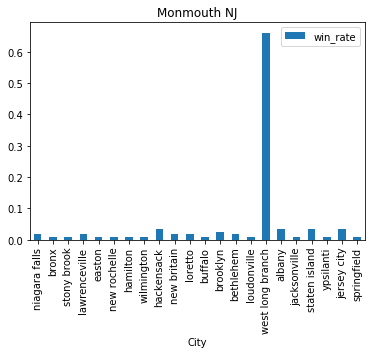

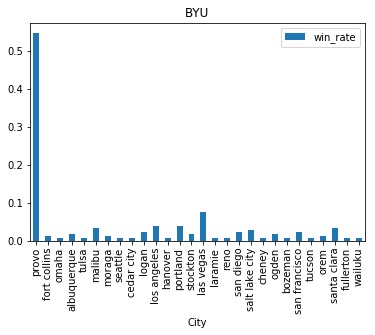

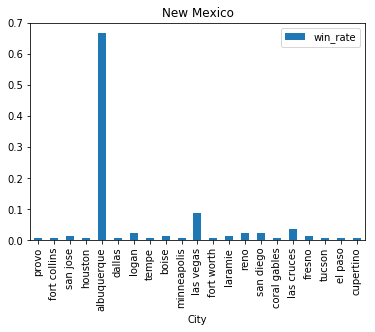

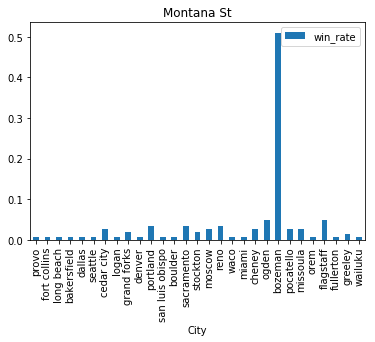

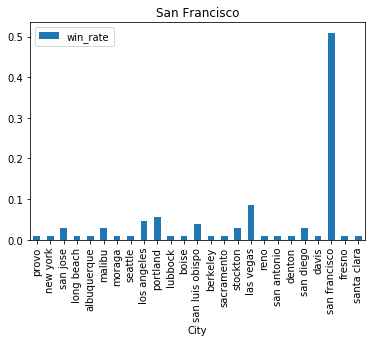

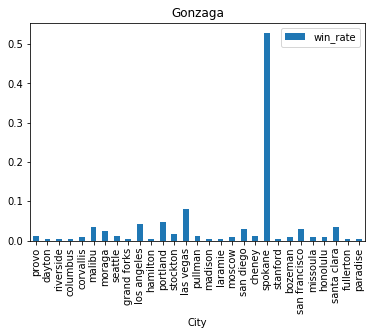

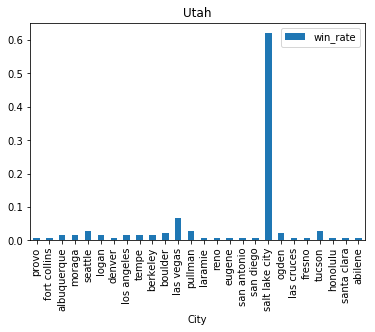

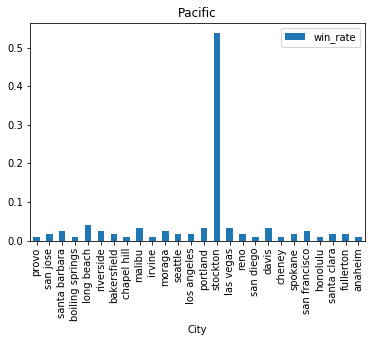

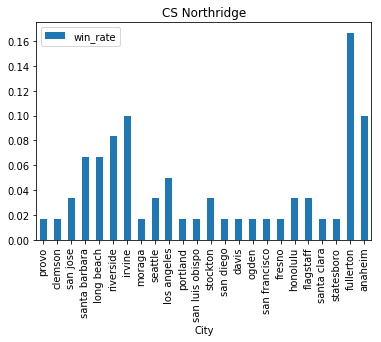

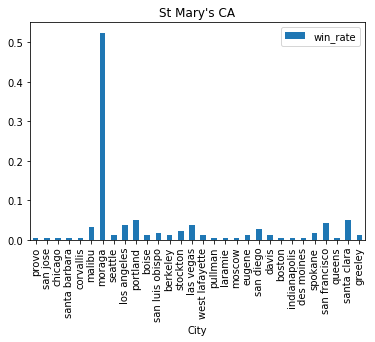

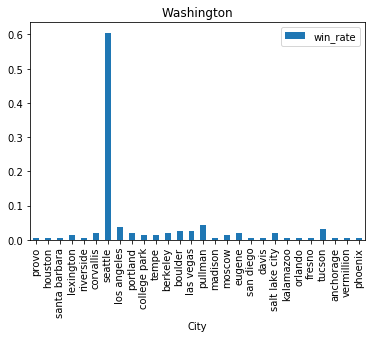

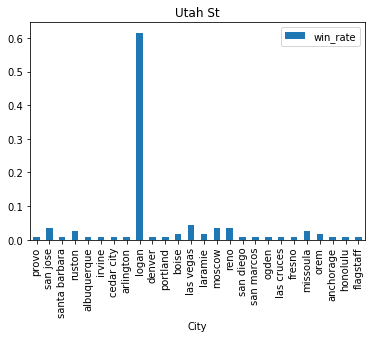

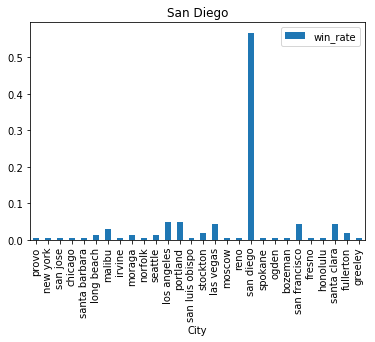

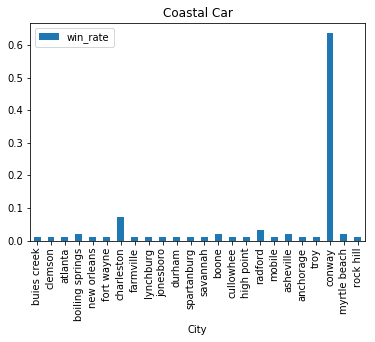

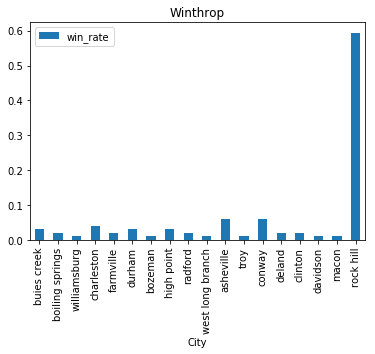

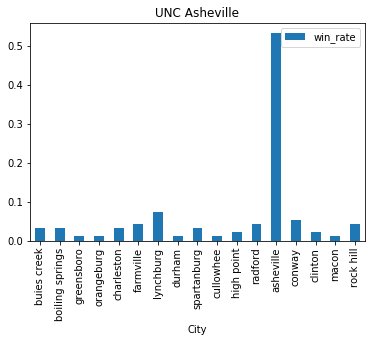

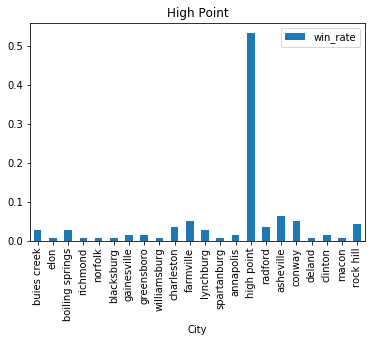

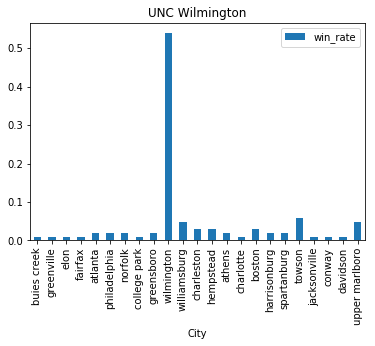

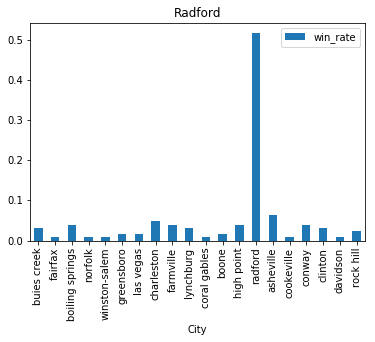

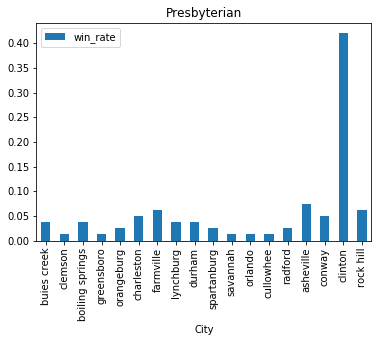

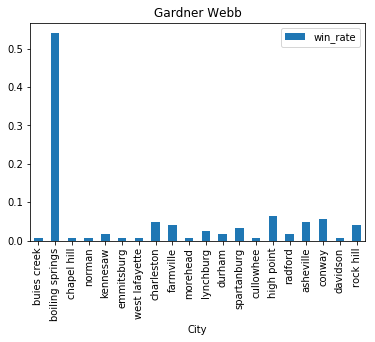

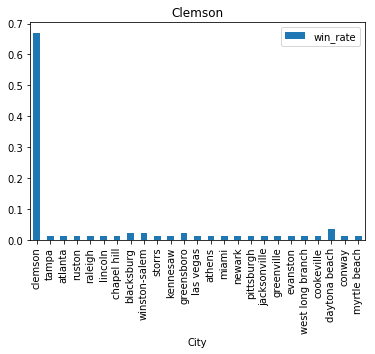

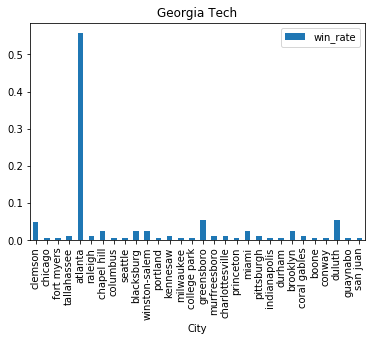

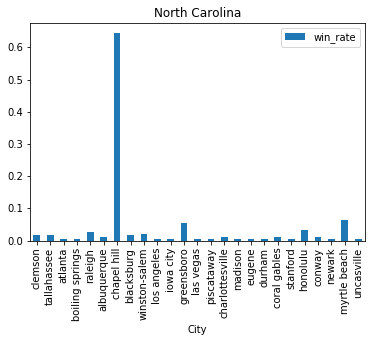

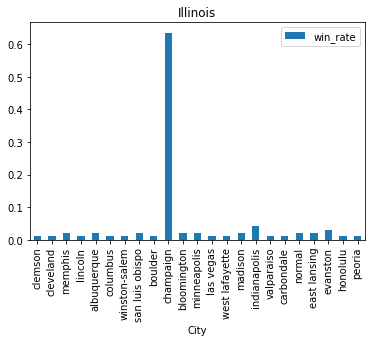

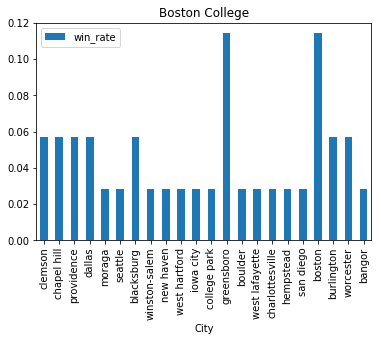

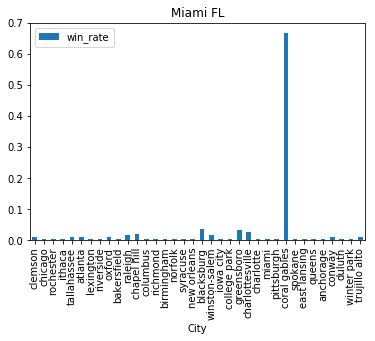

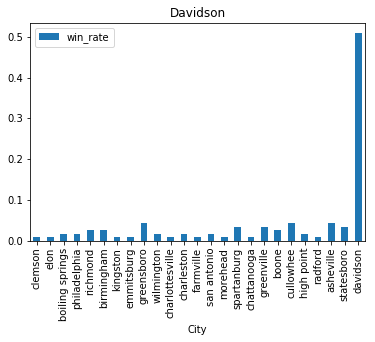

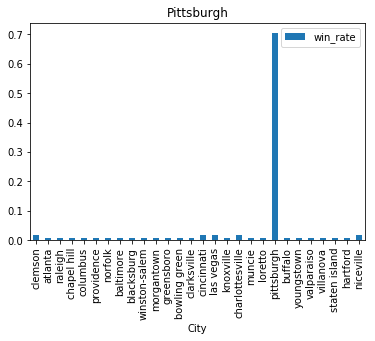

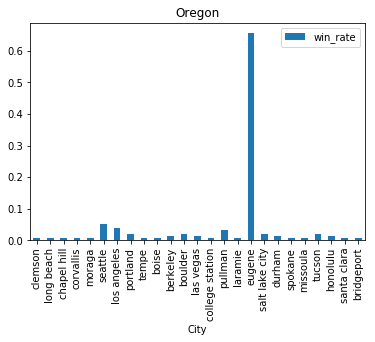

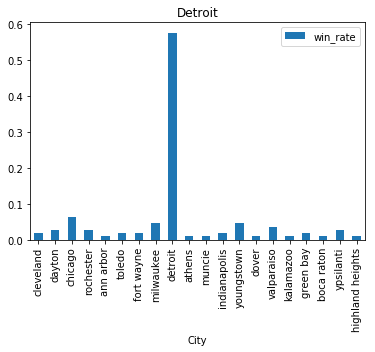

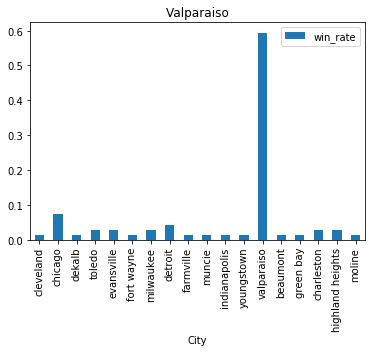

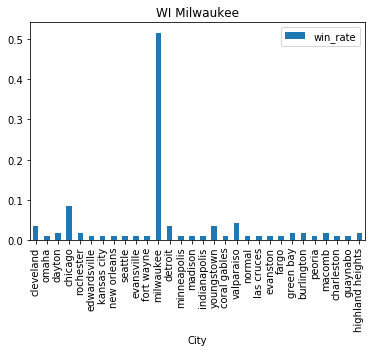

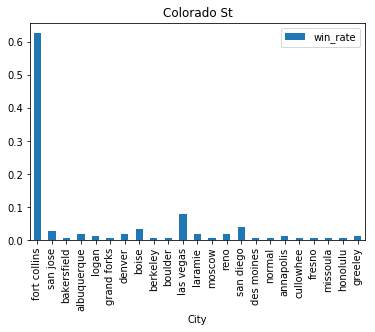

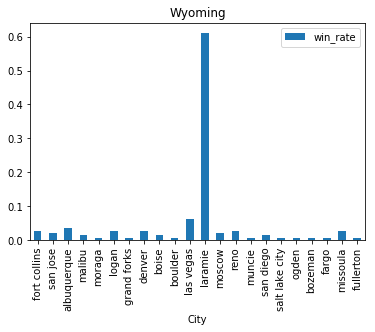

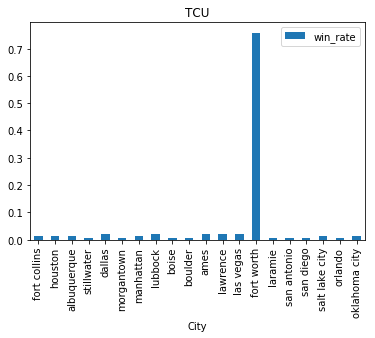

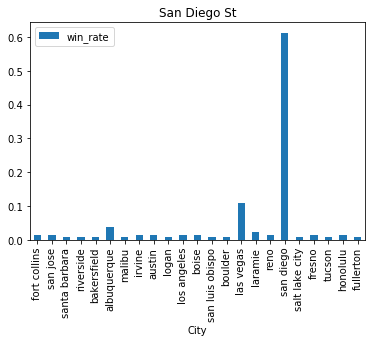

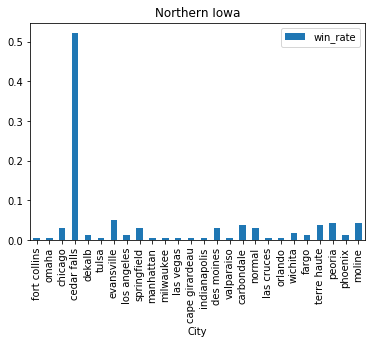

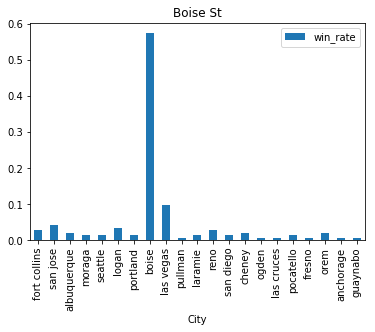

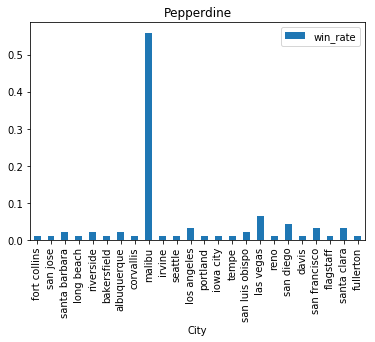

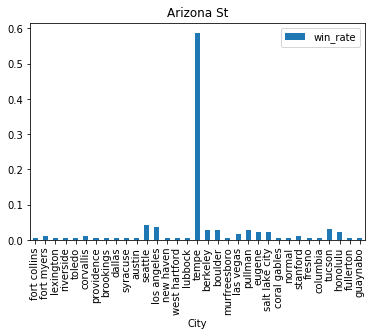

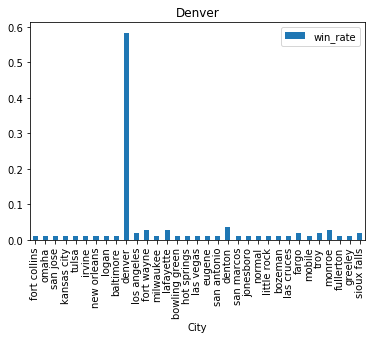

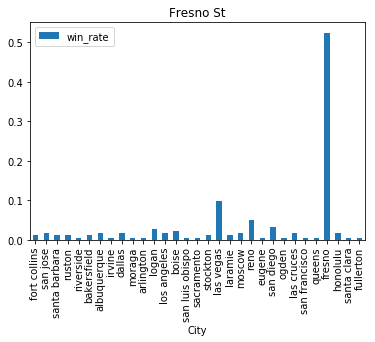

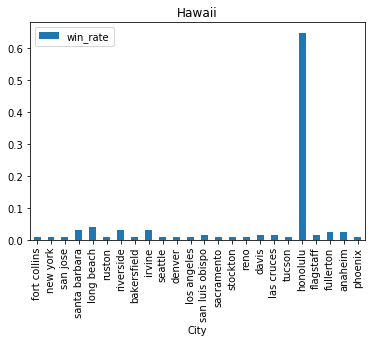

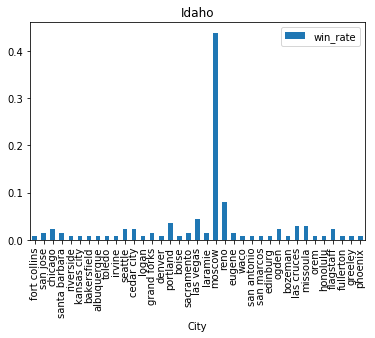

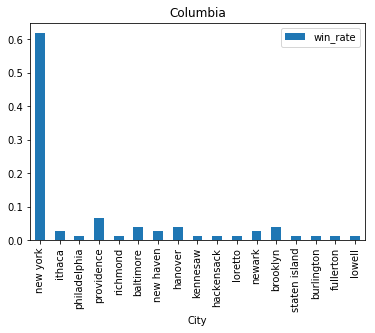

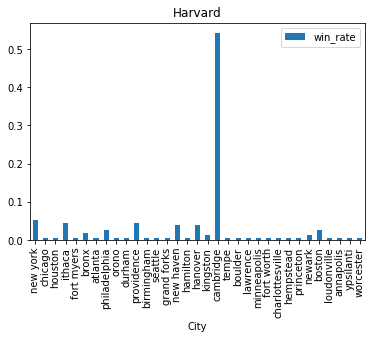

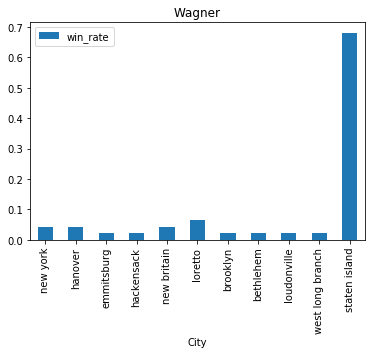

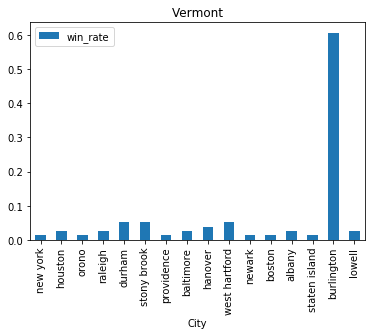

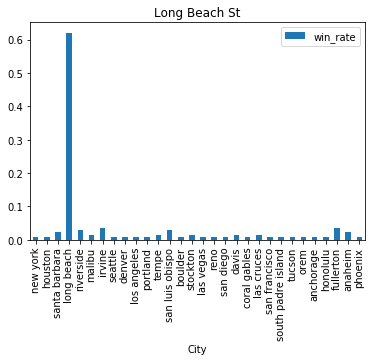

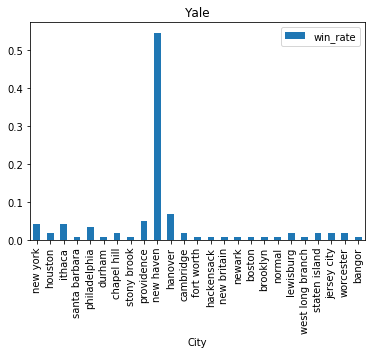

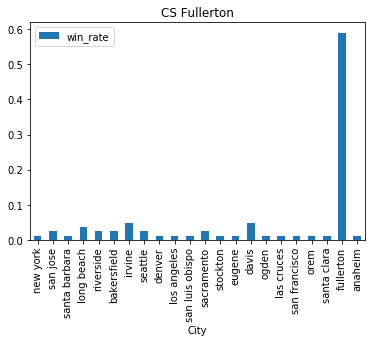

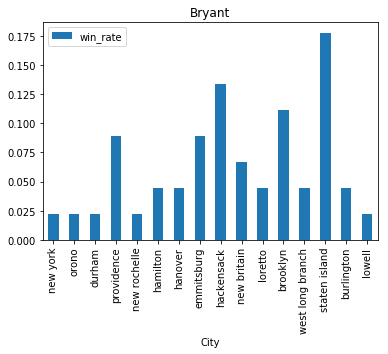

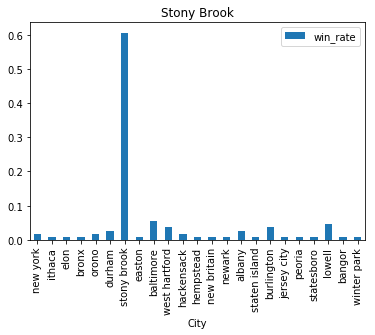

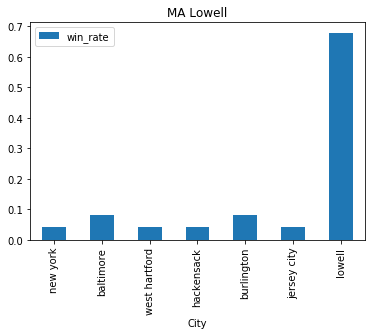

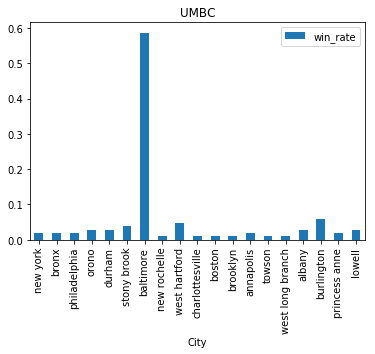

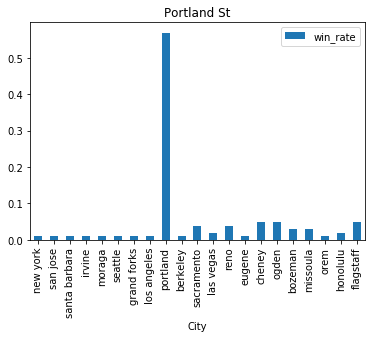

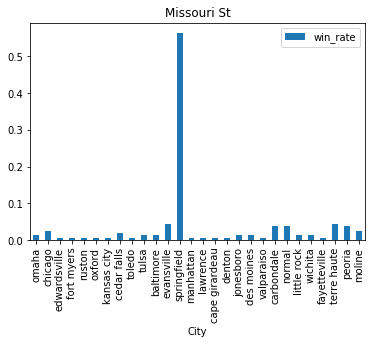

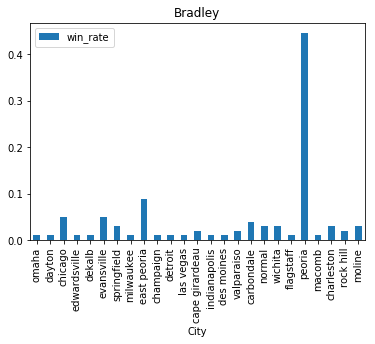

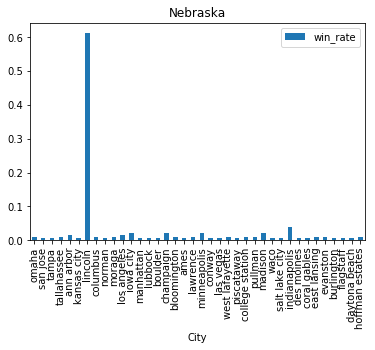

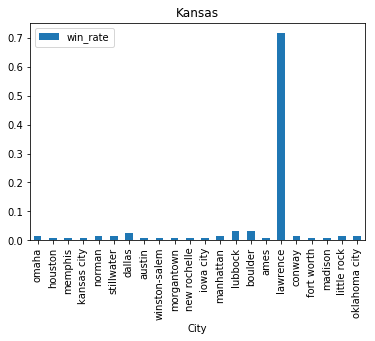

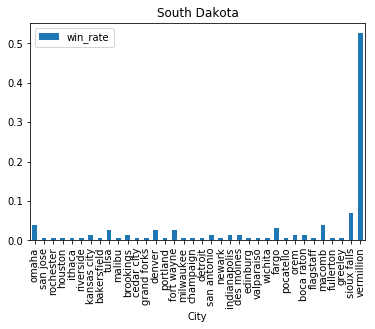

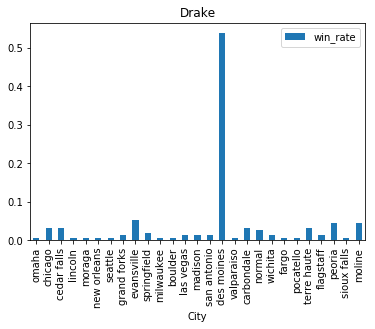

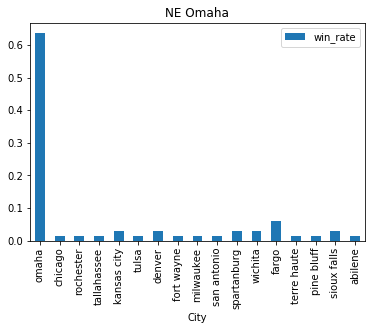

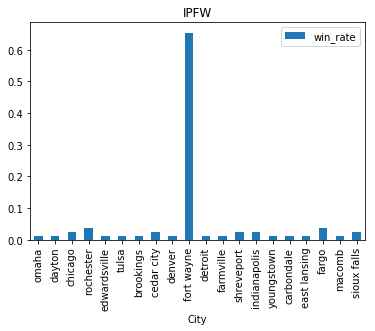

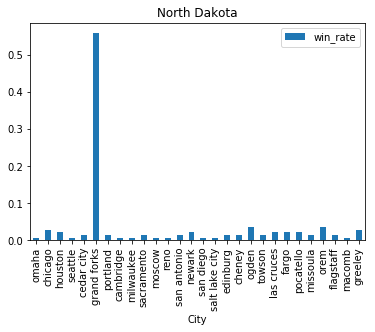

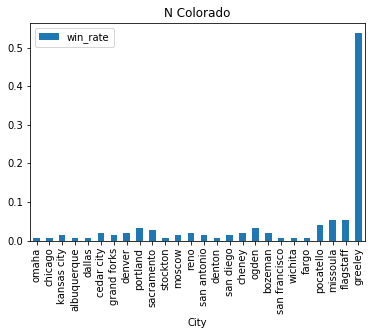

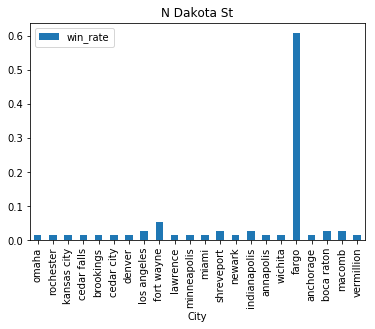

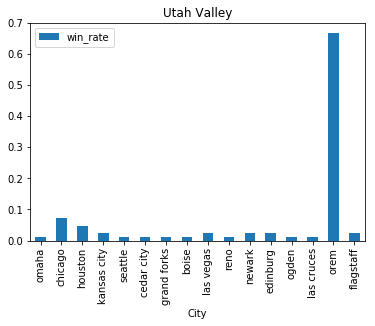

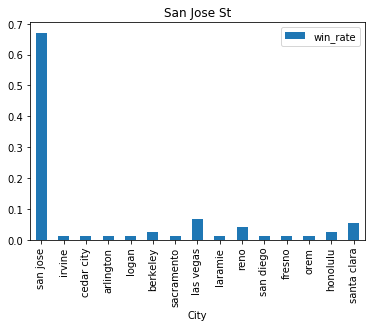

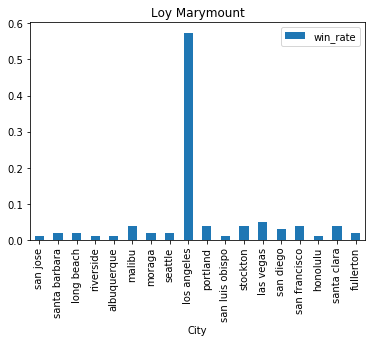

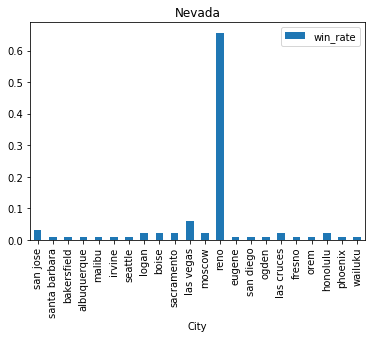

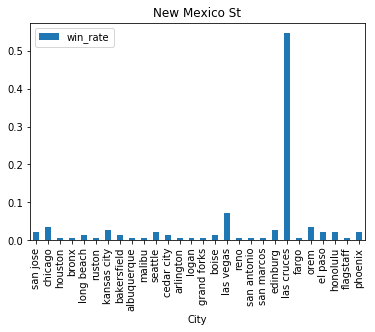

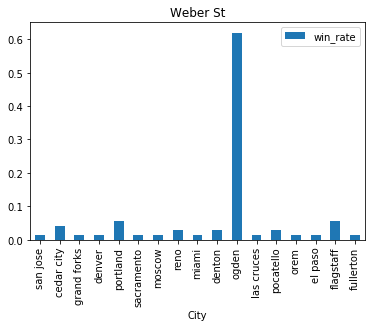

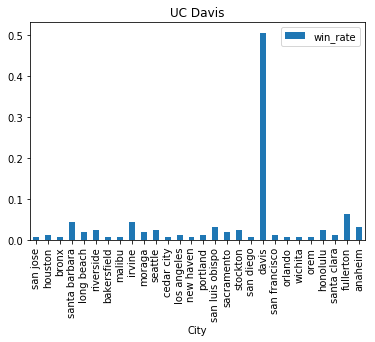

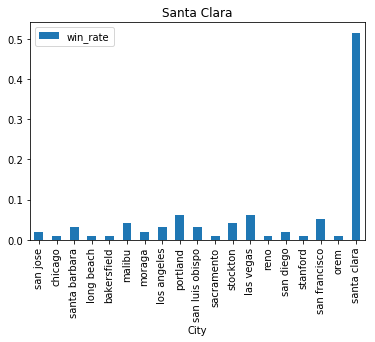

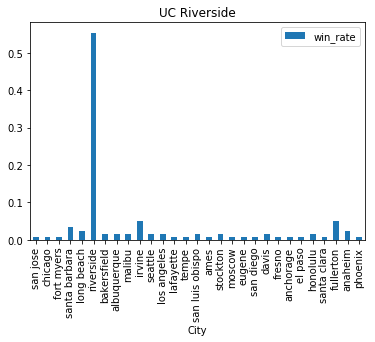

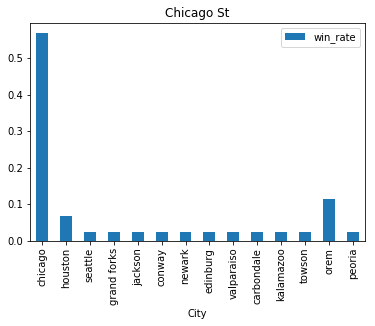

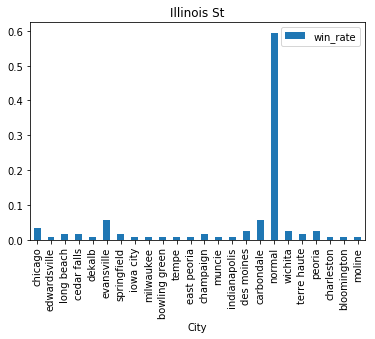

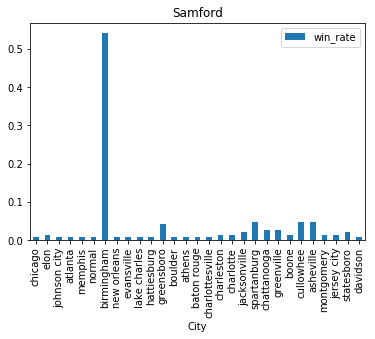

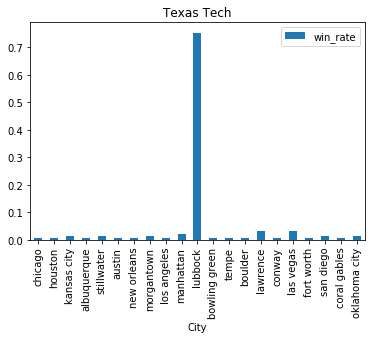

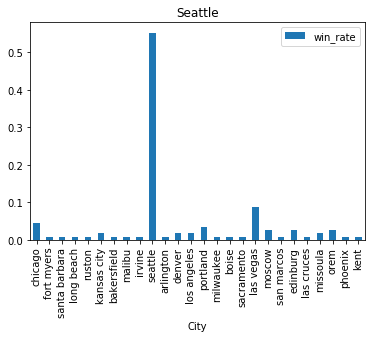

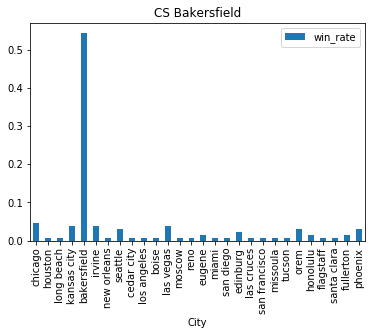

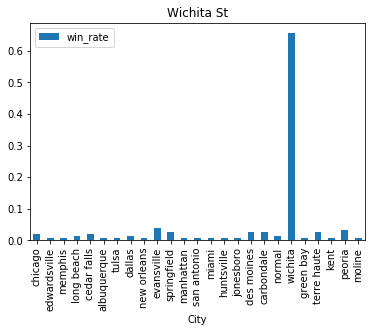

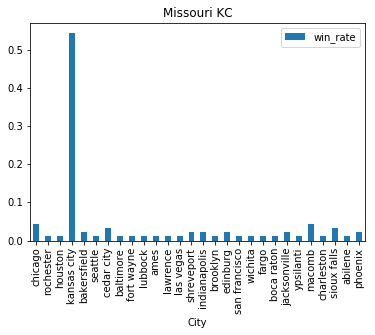

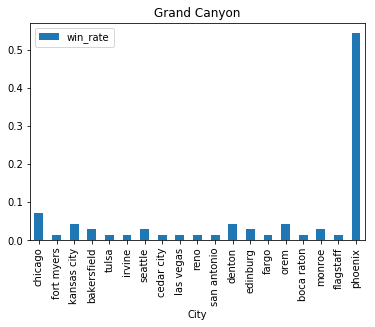

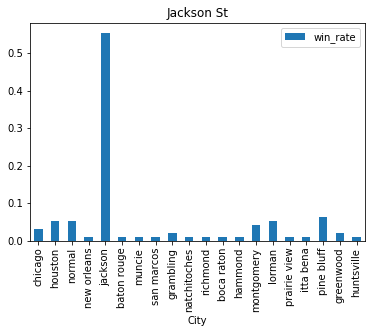

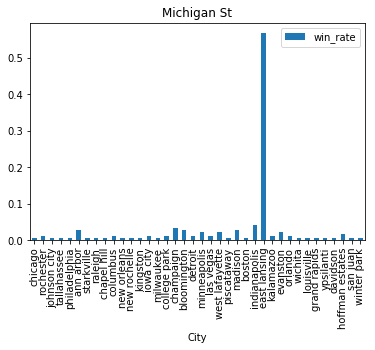

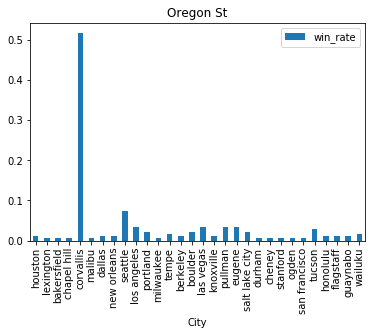

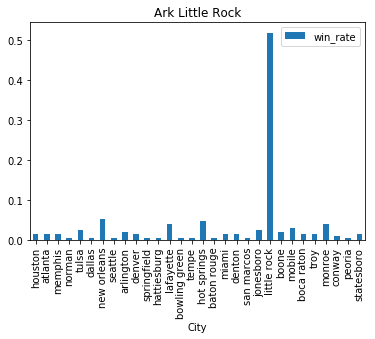

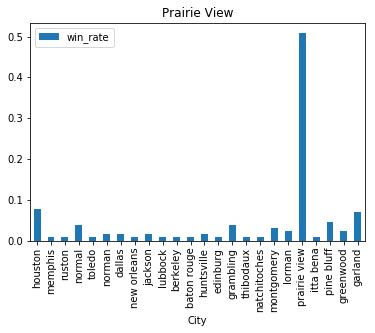

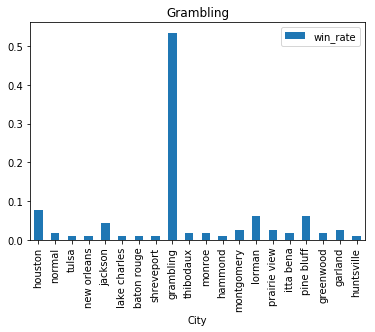

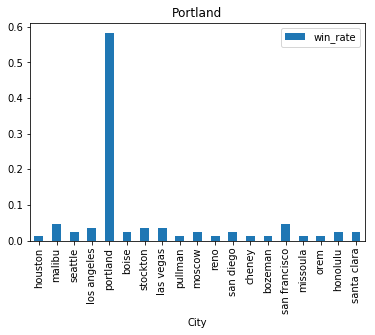

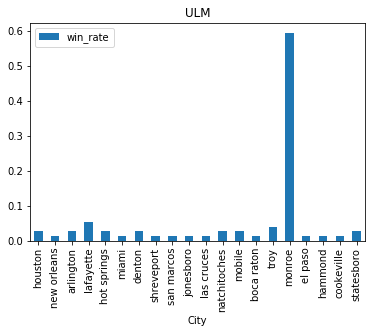

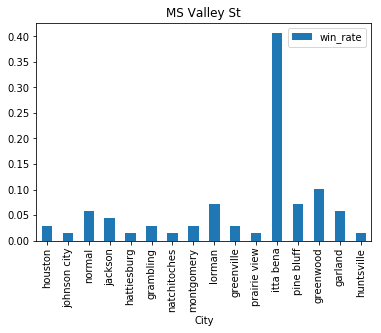

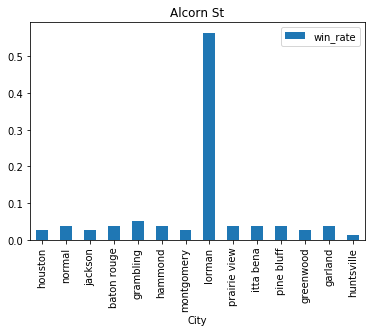

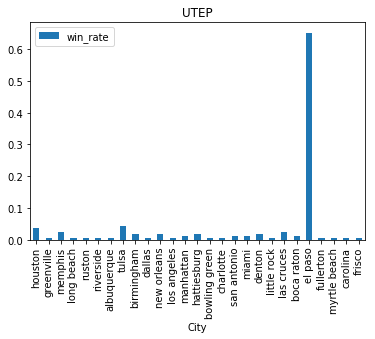

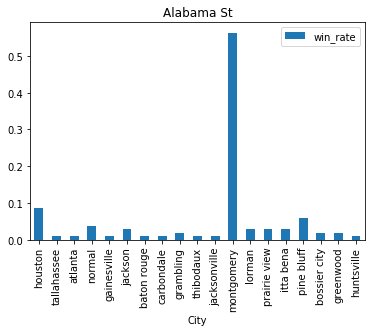

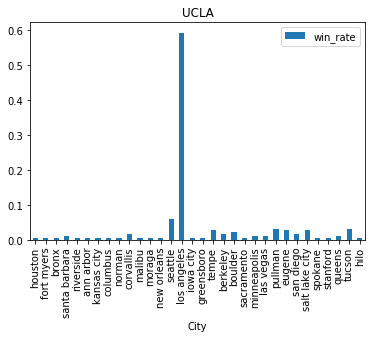

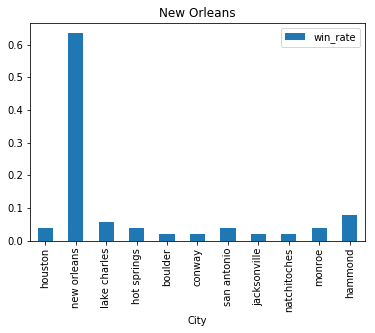

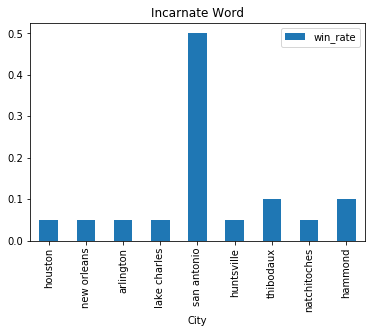

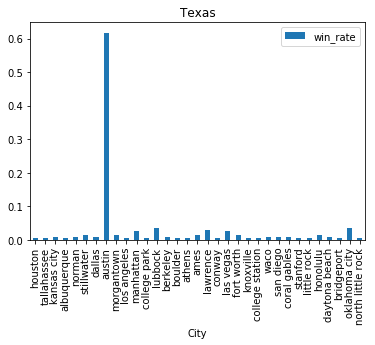

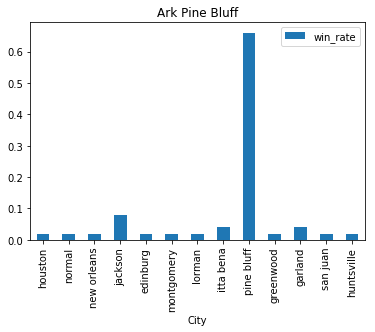

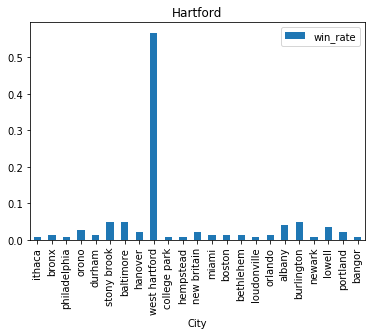

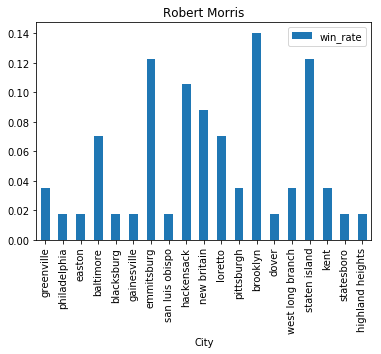

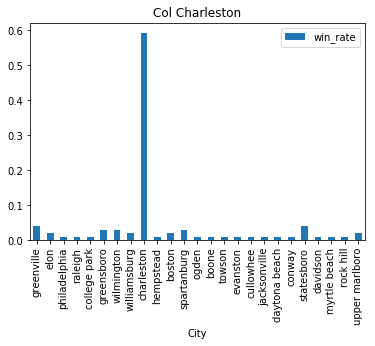

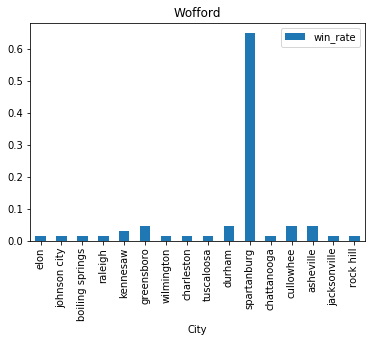

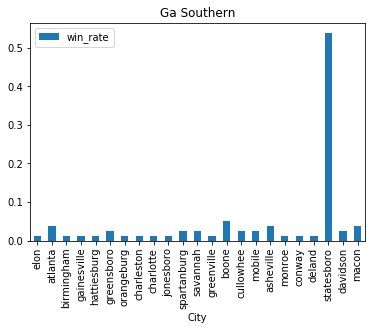

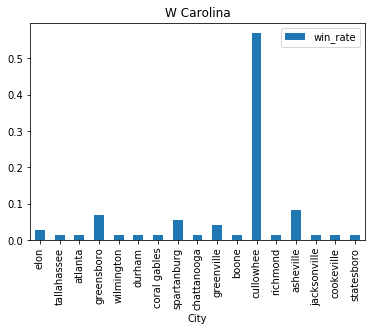

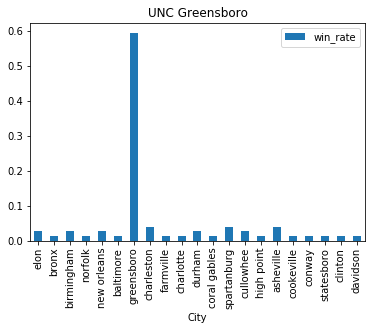

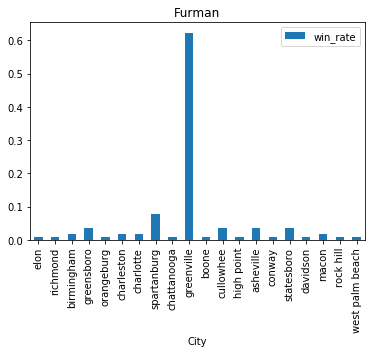

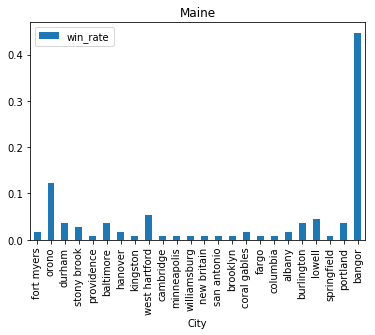

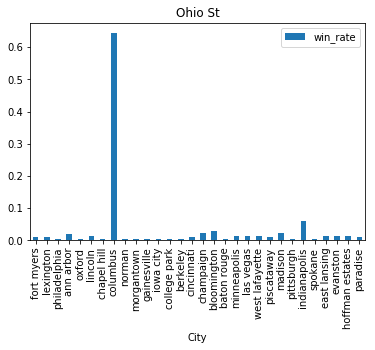

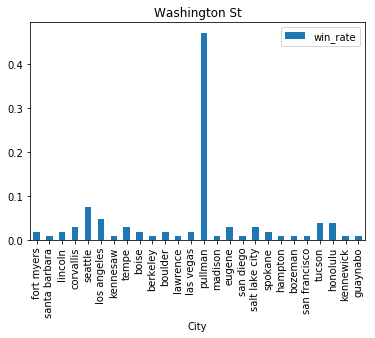

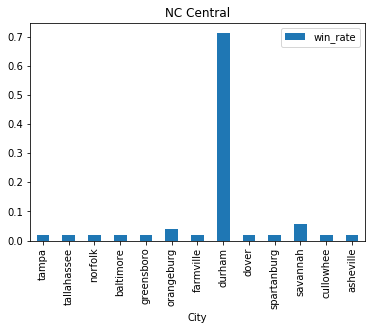

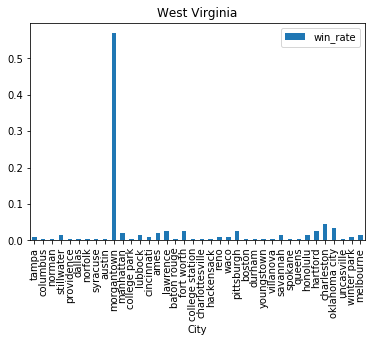

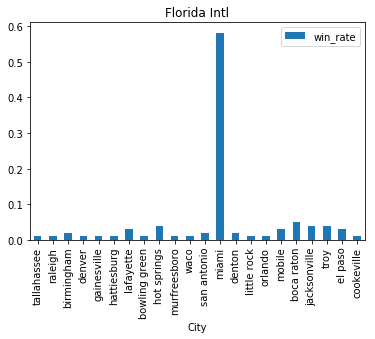

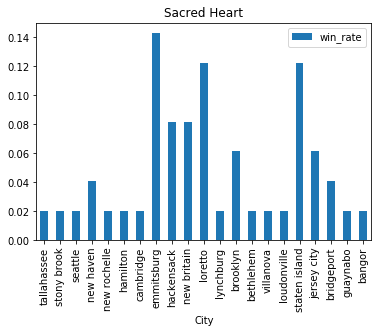

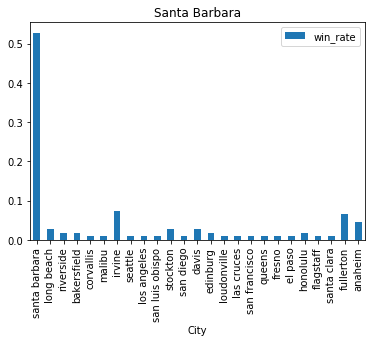

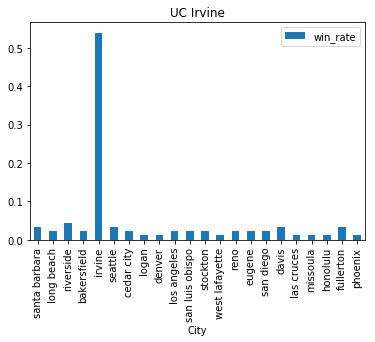

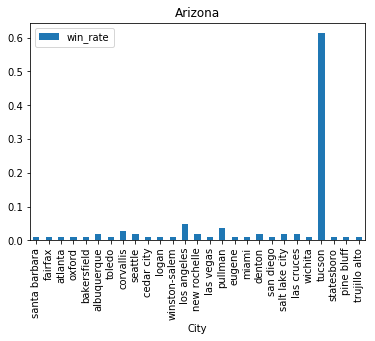

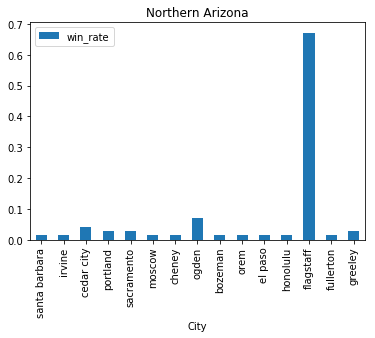

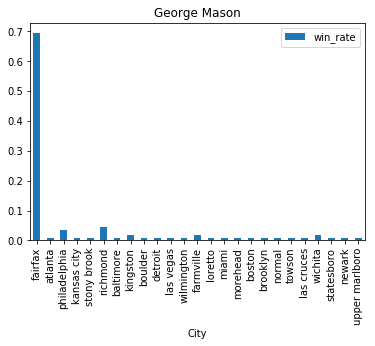

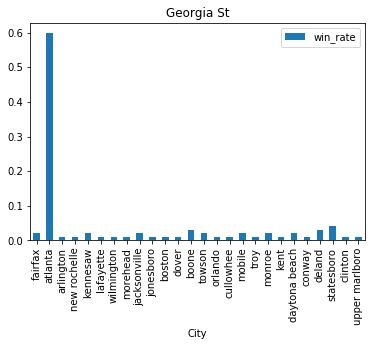

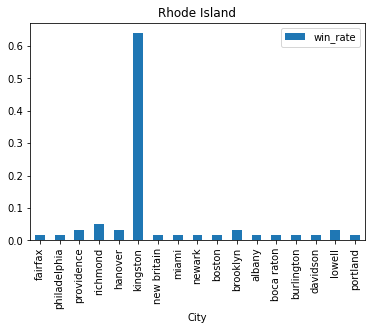

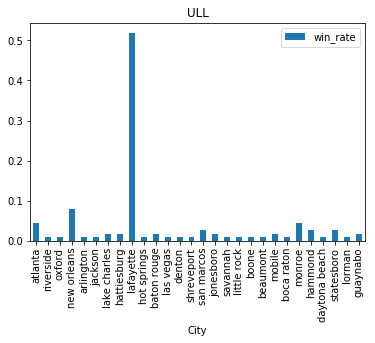

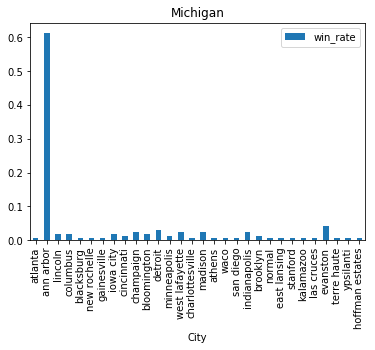

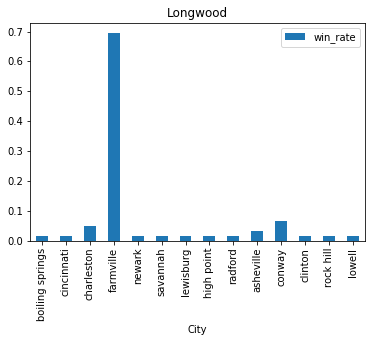

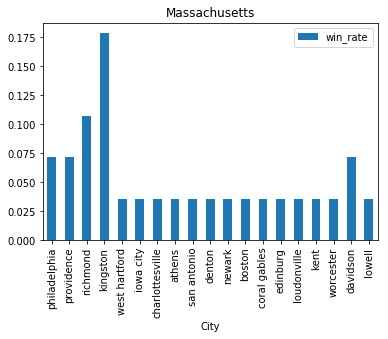

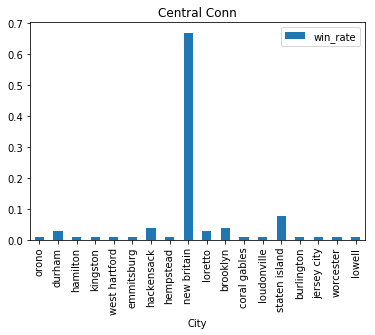

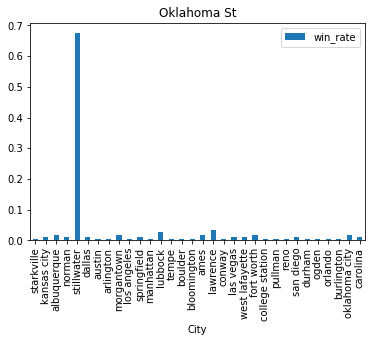

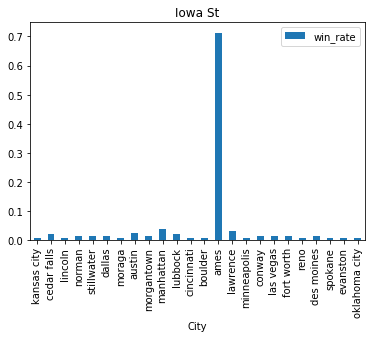

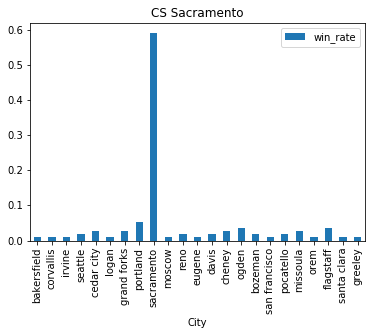

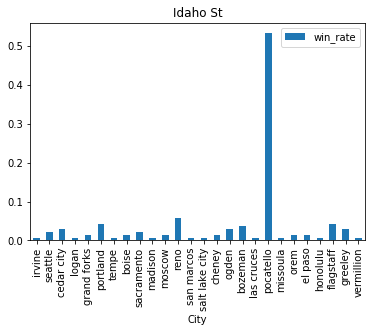

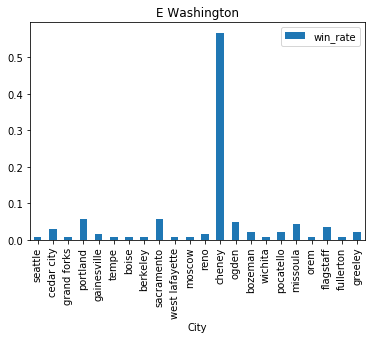

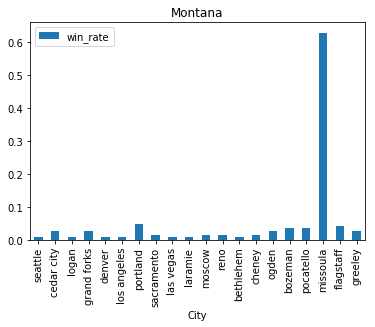

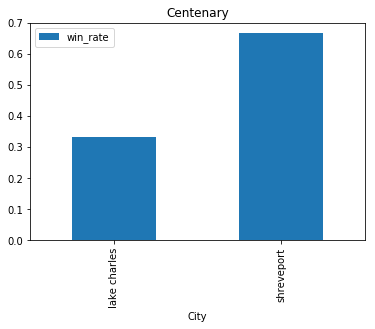

In [27]:
def apply_func(row):
    return win_by_city[row['City']]


for key in keys:
    df = grouped_by_winning.get_group(key)
    win_by_city = dict(df['City'].value_counts(normalize=True))
    df['win_rate'] = df.apply(apply_func, axis = 1)
    df = df.drop_duplicates(subset = ['City'])
    
    df.plot(x = 'City', y = 'win_rate', kind = 'bar')
    title = df.WTeamID.values[0]
    plt.title(title)
    plt.savefig('./HCA/' + title + '.jpg', dpi = 1000)
    
    plt.show()

In [22]:
def apply_func(row):
    return win_by_city[row['City']]

In [ ]:
for key in keys:
    df = grouped_by_winning.get_group(key)
    win_by_city = dict(df['City'].value_counts(normalize=True))
    df['win_rate'] = df.apply(apply_func, axis = 1)
    df = df.drop_duplicates(subset = ['City'])
    print(df.win_rate.values)
    title = df.WTeamID.values[0]
    print(title)
    create_map(df['lat'].values, df['lng'].values, color = df['City'].values, size = df['win_rate'].values * 500, title = title)
    

In [23]:
from sklearn.preprocessing import LabelEncoder

def create_map(lats, longs, color = None, title = None, size = None):
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,
                rsphere=(6378137.00,6356752.3142),\
                resolution='h',area_thresh=1000.,projection='lcc',\
                lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    
    if color is not None:
        le = LabelEncoder()
        color = le.fit_transform(color)
        
    m.drawcoastlines(color='gray', zorder=0)
    m.drawcountries(color='gray', zorder= -1)
    m.drawstates(color='gray', zorder= -1)
    
    
    
    x, y = m(longs, lats)
    
    if color is not None:
        if size is not None:
            m.scatter(x, y, c = color, s = size)
            
            if title is not None:
                plt.title(title)
                print(title)
                plt.savefig('./geo_hca/' + title + '.jpg', dpi = 500)
        
            return
        
        else:
            m.scatter(x, y, c = color)
            return 
        
    m.scatter(x, y, c = color)
    
    if title is not None:
        plt.title(title)
        print(title)
        plt.savefig('./geo_hca/' + title + '.jpg', dpi = 500)
        
    

In [24]:
merged

Season  DayNum         WTeamID          LTeamID   CRType  \
0        2010      11           Akron            IUPUI  Regular   
1        2010      30           Akron             IPFW  Regular   
2        2010      33           Akron    Youngstown St  Regular   
3        2010      56          Temple            Akron  Regular   
4        2010      68           Akron          Buffalo  Regular   
5        2010      72           Akron             Kent  Regular   
6        2010      82           Akron       W Michigan  Regular   
7        2010      94           Akron       C Michigan  Regular   
8        2010      96           Akron       N Illinois  Regular   
9        2010     110   Bowling Green            Akron  Regular   
10       2010     117           Akron         Miami OH  Regular   
11       2010     120           Akron             Ohio  Regular   
12       2011      20           Akron          Niagara  Regular   
13       2011      22           Akron    Robert Morris  Regular   
14       2011      30        Duquesne            Akron  Regular   
15       2011      33       Wright St            Akron  Regular   
16       2011      40           Akron     Cleveland St  Regular   
17       2011      65         Buffalo            Akron  Regular   
18       2011      68           Akron             Ohio  Regular   
19       2011      75        Miami OH            Akron  Regular   
20       2011      82      E Michigan            Akron  Regular   
21       2011      93          Toledo            Akron  Regular   
22       2011     103           Akron          Ball St  Regular   
23       2011     113   Bowling Green            Akron  Regular   
24       2011     121            Kent            Akron  Regular   
25       2011     124           Akron       W Michigan  Regular   
26       2012      18           Akron           Howard  Regular   
27       2012      18          Drexel          Detroit  Regular   
28       2012      19          Drexel            Akron  Regular   
29       2012      19          Howard          Detroit  Regular   
...       ...     ...             ...              ...      ...   
44039    2018      26            Kent          Memphis  Regular   
44040    2018      24   Virginia Tech           Drexel  Regular   
44041    2018      24   West Virginia           Butler  Regular   
44042    2018      25          Butler    Virginia Tech  Regular   
44043    2018      25   West Virginia           Drexel  Regular   
44044    2018      26          Drexel           Butler  Regular   
44045    2018      26   West Virginia    Virginia Tech  Regular   
44046    2018      40     TX Southern  Northwestern LA  Regular   
44047    2018      47          Furman             Ohio  Regular   
44048    2018      47             WKU          Stetson  Regular   
44049    2018      48        Missouri          Indiana  Regular   
44050    2018      48        Virginia             Ohio  Regular   
44051    2018      48             WKU           Toledo  Regular   
44052    2018      48          Xavier           Furman  Regular   
44053    2018      49        Missouri           Xavier  Regular   
44054    2018      49          Toledo    Southern Univ  Regular   
44055    2018      49        Virginia          Indiana  Regular   
44056    2018      48   South Florida     Florida Intl  Regular   
44057    2018     128     North Texas        Charlotte  Regular   
44058    2018     128            Rice     Old Dominion  Regular   
44059    2018     128  UT San Antonio      FL Atlantic  Regular   
44060    2018     128            UTEP    Southern Miss  Regular   
44061    2018     129     North Texas   Louisiana Tech  Regular   
44062    2018     129            Rice             MTSU  Regular   
44063    2018     129             UAB             UTEP  Regular   
44064    2018     129             WKU   UT San Antonio  Regular   
44065    2018     130             UAB             Rice  Regular   
44066    2018     130             WKU      North Texas

In [25]:
states = pd.read_csv('states.csv')
states = states.drop(columns= ['State']).rename(columns = {'State Code': 'State'}).drop(columns = ['Division'])

In [26]:
with_regions = merged.merge(states)

In [27]:
by_region = with_regions.groupby('Region')

In [28]:
regions = with_regions['Region'].unique()

In [29]:
num_total_matches = len(with_regions)
dict_series = {}

for region in regions:
    data_in_region = by_region.get_group(region)
    dict_series[data_in_region['Region'].values[0]] = len(data_in_region) / float(num_total_matches)

In [30]:
dict_series

{'Midwest': 0.19080068143100512,
 'Northeast': 0.15775127768313457,
 'South': 0.4689153889835321,
 'West': 0.18253265190232823}

In [31]:
with_regions['prop_matches'] = with_regions.apply(lambda row: dict_series[row['Region']], axis = 1)

In [32]:
with_regions.head()

Season  DayNum WTeamID        LTeamID   CRType   City State      lat  \
0    2010      11   Akron          IUPUI  Regular  akron    OH  41.0802   
1    2010      30   Akron           IPFW  Regular  akron    OH  41.0802   
2    2010      33   Akron  Youngstown St  Regular  akron    OH  41.0802   
3    2010      56  Temple          Akron  Regular  akron    OH  41.0802   
4    2010      68   Akron        Buffalo  Regular  akron    OH  41.0802   

       lng   Region  prop_matches  
0 -81.5219  Midwest      0.190801  
1 -81.5219  Midwest      0.190801  
2 -81.5219  Midwest      0.190801  
3 -81.5219  Midwest      0.190801  
4 -81.5219  Midwest      0.190801

In [33]:
only_unique_labels = with_regions.drop_duplicates(subset = ['State'])

In [34]:
with_only_states_and_props = only_unique_labels[['State', 'prop_matches', 'Region']]

In [35]:
import folium

In [36]:
geopath = 'states.geojson'
states = folium.Map(location=[48, -102], zoom_start = 3)
# add the state boundaries to the map
folium.GeoJson(geopath, name = "states").add_to(states)

In [37]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [38]:
with_only_states_and_props.head()

State  prop_matches     Region
0       OH      0.190801    Midwest
1767    TX      0.468915      South
4787    DC      0.468915      South
5257    WV      0.468915      South
5532    NY      0.157751  Northeast

In [39]:
grps = with_only_states_and_props.groupby('Region')


states.choropleth (
geo_data=geopath,
name='choropleth',
data=with_only_states_and_props,
columns=['State', 'prop_matches'],
key_on='feature.id',
fill_color= 'PuOr',
fill_opacity=0.5,
line_opacity=0.2,
legend='Number of Matches Played across Various States')
    

/anaconda3/lib/python2.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [41]:
states.save("prop_matches_in_state.html")

In [42]:
dict_series

{'Midwest': 0.19080068143100512,
 'Northeast': 0.15775127768313457,
 'South': 0.4689153889835321,
 'West': 0.18253265190232823}

In [45]:
states

In [46]:
merged.head()

Season  DayNum WTeamID        LTeamID   CRType   City State      lat  \
0    2010      11   Akron          IUPUI  Regular  akron    OH  41.0802   
1    2010      30   Akron           IPFW  Regular  akron    OH  41.0802   
2    2010      33   Akron  Youngstown St  Regular  akron    OH  41.0802   
3    2010      56  Temple          Akron  Regular  akron    OH  41.0802   
4    2010      68   Akron        Buffalo  Regular  akron    OH  41.0802   

       lng  
0 -81.5219  
1 -81.5219  
2 -81.5219  
3 -81.5219  
4 -81.5219

In [48]:
dict_teams = dict(WTeams['TeamName'])

In [47]:
WNCAATourneyDetailedResults.head()

Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  WFGA  \
0    2010     138     3124      69     3201      55    N      0    28    57   
1    2010     138     3173      67     3395      66    N      0    23    59   
2    2010     138     3181      72     3214      37    H      0    26    57   
3    2010     138     3199      75     3256      61    H      0    25    63   
4    2010     138     3207      62     3265      42    N      0    24    68   

  ...   LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0 ...      34     3     5   17   19    12   18     4     1   18  
1 ...      27    14    15   18   26     8    8     8     6   22  
2 ...      15     3     8   10   21     4   16     6     4   20  
3 ...      20    17    22   16   21    13   16     5     4   24  
4 ...      26    11    17   16   22     9   10     3     4   12  

[5 rows x 34 columns]

In [49]:
subset = WRegularSeasonDetailedResults.copy()
subset['Winning Team'] = subset['WTeamID'].apply(lambda val: dict_teams[val])

In [50]:
subset = subset[['WLoc', 'Season', 'DayNum', 'Winning Team']]

In [51]:
subset_home_games = subset[subset['WLoc'] == 'H']

In [52]:
len(subset_home_games['Winning Team'].unique())

350

In [53]:
games = WGameCities[['Season', 'DayNum', 'WTeamID']]

In [54]:
games.head()

Season  DayNum         WTeamID
0    2010      11           Akron
1    2010      11         Alabama
2    2010      11   American Univ
3    2010      11  Appalachian St
4    2010      11            Army

In [55]:
subset_home_games.head()

WLoc  Season  DayNum   Winning Team
0    H    2010      11          Akron
4    H    2010      11           Army
5    H    2010      11         Auburn
6    H    2010      11        Belmont
7    H    2010      11  Bowling Green

In [56]:
WGameCities.head()

Season  DayNum         WTeamID         LTeamID   CRType            City  \
0    2010      11           Akron           IUPUI  Regular           akron   
1    2010      11         Alabama  Tennessee Tech  Regular  corpus christi   
2    2010      11   American Univ          Howard  Regular      washington   
3    2010      11  Appalachian St        Marshall  Regular      huntington   
4    2010      11            Army          Wagner  Regular      west point   

  State  
0    OH  
1    TX  
2    DC  
3    WV  
4    NY

In [57]:
subset_home_games.head()

WLoc  Season  DayNum   Winning Team
0    H    2010      11          Akron
4    H    2010      11           Army
5    H    2010      11         Auburn
6    H    2010      11        Belmont
7    H    2010      11  Bowling Green

In [58]:
WGameCities.head()

Season  DayNum         WTeamID         LTeamID   CRType            City  \
0    2010      11           Akron           IUPUI  Regular           akron   
1    2010      11         Alabama  Tennessee Tech  Regular  corpus christi   
2    2010      11   American Univ          Howard  Regular      washington   
3    2010      11  Appalachian St        Marshall  Regular      huntington   
4    2010      11            Army          Wagner  Regular      west point   

  State  
0    OH  
1    TX  
2    DC  
3    WV  
4    NY

In [59]:
subset_home_games = subset_home_games.rename(columns={'Winning Team':'WTeamID'})

In [60]:
with_home_locs = WGameCities.merge(subset_home_games)

In [61]:
with_home_locs.head()

Season  DayNum        WTeamID        LTeamID   CRType           City State  \
0    2010      11          Akron          IUPUI  Regular          akron    OH   
1    2010      11           Army         Wagner  Regular     west point    NY   
2    2010      11         Auburn           Troy  Regular         auburn    AL   
3    2010      11        Belmont  Cent Arkansas  Regular      nashville    TN   
4    2010      11  Bowling Green     Chicago St  Regular  bowling green    OH   

  WLoc  
0    H  
1    H  
2    H  
3    H  
4    H

In [62]:
teams_with_homes = with_home_locs[['City', 'State', 'WTeamID']]

In [63]:
teams_with_homes = teams_with_homes.set_index('WTeamID')

In [64]:
with_home_locs.head()

Season  DayNum        WTeamID        LTeamID   CRType           City State  \
0    2010      11          Akron          IUPUI  Regular          akron    OH   
1    2010      11           Army         Wagner  Regular     west point    NY   
2    2010      11         Auburn           Troy  Regular         auburn    AL   
3    2010      11        Belmont  Cent Arkansas  Regular      nashville    TN   
4    2010      11  Bowling Green     Chicago St  Regular  bowling green    OH   

  WLoc  
0    H  
1    H  
2    H  
3    H  
4    H

In [65]:
teams_with_homes.values

array([['akron', 'OH'],
       ['west point', 'NY'],
       ['auburn', 'AL'],
       ..., 
       ['fort myers', 'FL'],
       ['lynchburg', 'VA'],
       ['loretto', 'PA']], dtype=object)

In [66]:
teams_with_homes = teams_with_homes.reset_index()

In [67]:
teams_with_homes = teams_with_homes.drop_duplicates(subset = ['WTeamID'])

In [68]:
dict_teams_homes = {}
for values in teams_with_homes.values:
    dict_teams_homes[values[0]] = values[1:]
    
dict_teams_homes['UCLA'] = ['los angeles', 'CA']

In [69]:
def apply_function(row):
    if (dict_teams_homes[row['WTeamID']][0] == row['City']) and (dict_teams_homes[row['WTeamID']][1] == row['State']):
        return 'H'
    elif (dict_teams_homes[row['LTeamID']][0] == row['City']) and (dict_teams_homes[row['LTeamID']][1] == row['State']):
        return 'A'
    else:
        return 'N'

In [70]:
WGameCities['Home'] = WGameCities.apply(apply_function, axis = 1)

In [71]:
WGameCities.head()

Season  DayNum         WTeamID         LTeamID   CRType            City  \
0    2010      11           Akron           IUPUI  Regular           akron   
1    2010      11         Alabama  Tennessee Tech  Regular  corpus christi   
2    2010      11   American Univ          Howard  Regular      washington   
3    2010      11  Appalachian St        Marshall  Regular      huntington   
4    2010      11            Army          Wagner  Regular      west point   

  State Home  
0    OH    H  
1    TX    N  
2    DC    H  
3    WV    A  
4    NY    H

In [72]:
WGameCities[WGameCities['Home'] == 'A'].head()

Season  DayNum         WTeamID      LTeamID   CRType           City State  \
3     2010      11  Appalachian St     Marshall  Regular     huntington    WV   
8     2010      11         Buffalo      Niagara  Regular  niagara falls    NY   
16    2010      11    CS Fullerton  San Jose St  Regular       san jose    CA   
19    2010      11         Detroit      Oakland  Regular      rochester    MI   
20    2010      11            Duke  Houston Bap  Regular        houston    TX   

   Home  
3     A  
8     A  
16    A  
19    A  
20    A

In [73]:
unique_teams = WGameCities.WTeamID.unique()
dict_win_rates = {}

In [392]:
for city in unique_teams:   
    city_df = WGameCities[WGameCities['WTeamID'] == city]
    post_proc = city_df.copy()
    post_proc['City_State'] = post_proc['City']+'@'+post_proc['State']
    city_neutral_win_rate = post_proc[city_df['Home'] == 'N']['City_State'].value_counts(normalize = True)
    dict_win_rates[city] = city_neutral_win_rate

In [393]:
teams = list(dict_win_rates.keys())

In [394]:
lat_lngs_cities = merged[['City', 'State', 'lat', 'lng']]

In [395]:
lat_lngs_cities = lat_lngs_cities.drop_duplicates(subset = ['City', 'State'])

In [396]:
lat_lngs_cities.head()

City State      lat      lng
0             akron    OH  41.0802 -81.5219
130  corpus christi    TX  27.7173 -97.3822
254      washington    DC  38.9047 -77.0163
724      huntington    WV  38.4109 -82.4344
846      west point    NY  41.3645 -74.0139

In [79]:
def get_home_location(team):
    return dict_teams_homes[team]

In [80]:
get_home_location('Akron')

array(['akron', 'OH'], dtype=object)

In [81]:
def get_coords(city_state):
    city, state = tuple(city_state.split('@'))
    df = lat_lngs_cities[(lat_lngs_cities['City'] == city) & (lat_lngs_cities['State'] == state)]
    try:
        return (df['lat'].values[0], df['lng'].values[0])
    except: return -100

In [82]:
c2 = get_coords(dict_win_rates['Akron'].index[0])
dict_win_rates['Akron'].index[0]

'cleveland@OH'

In [83]:
def get_home_coords(team):
    home =  WGameCities[(WGameCities['WTeamID'] == team) & (WGameCities['Home'] == 'H')]
    return (home['City'] + '@' + home['State']).values[0]

In [84]:
c1 = get_coords(get_home_coords('Akron'))

In [85]:
dict_win_rates['Akron'].index

Index([u'cleveland@OH', u'fort myers@FL', u'denver@CO', u'dallas@TX',
       u'seattle@WA'],
      dtype='object')

In [86]:
dict_win_rates['Purdue']

indianapolis@IN       0.310345
hoffman estates@IL    0.137931
cancun@MX             0.137931
fort myers@FL         0.068966
east lansing@MI       0.068966
st. thomas@VI         0.068966
louisville@KY         0.034483
storrs@CT             0.034483
puerto vallarta@MX    0.034483
notre dame@IN         0.034483
freeport@BA           0.034483
honolulu@HI           0.034483
Name: City_State, dtype: float64

In [389]:
import math 
def haversine(lat1, lon1, lat2, lon2): 
      
    # distance between latitudes 
    # and longitudes 
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
  
    # convert to radians 
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
  
    # apply formulae 
    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
             math.cos(lat1) * math.cos(lat2)); 
    rad = 3958.8
    c = 2 * math.asin(math.sqrt(a)) 
    return rad * c 

In [390]:
l = [0]

def plot_distance(team_name):
    
    dict_final = {}

    series = dict_win_rates[team_name]
    hc = get_home_coords(team_name)
    
    if type(get_coords(hc)) == int:
        return
        
    lat_1, lng_1 = get_coords(hc)
    
    for city in series.index:
        coordinates = get_coords(city)
        if type(coordinates) == int:
            continue
        else:
            lat_2, lng_2 = coordinates
            dict_final[haversine(lat_1, lng_1, lat_2, lng_2)] = series[city]
            
    plt.scatter(list(dict_final.keys()), list(dict_final.values()), c = 'red',s = 1)
    l[0] = l[0] + len(list(dict_final.keys()))
    
    plt.title('Proportion of Matches Won Across Neutral Locations')
    plt.xlabel('Distance in Miles from Home to a Neutral Location')
    plt.ylabel('% of Games won')
    plt.savefig('./aggregated/Aggregated.jpg', dpi = 200)
    
    return list(dict_final.items())
    

In [391]:
def get_all_distributions():
    points = []
    for team_university in list(dict_win_rates.keys()):
        points += [plot_distance(team_university)]
    return points

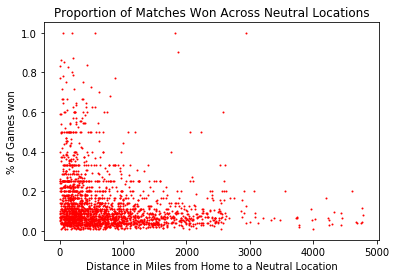

In [90]:
points = get_all_distributions()

In [397]:
props = []

for list_coords in points:
    try:
        for coord in list_coords:
            props += [coord]
    except:
        continue

In [398]:
distances, games_won = zip(*props)

In [399]:
distances = np.array(distances)
games_won = np.array(games_won)

Text(0.5,0,'Distance to Home Location from Neutral Location')

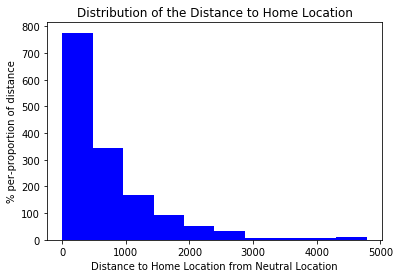

In [406]:
plt.hist(distances, color = 'blue')
plt.title('Distribution of the Distance to Home Location')
plt.ylabel('% per-proportion of distance')
plt.xlabel('Distance to Home Location from Neutral Location')

In [417]:
len(games)


46842

In [408]:
stats.spearmanr(distances, games_won)

SpearmanrResult(correlation=-0.31255920249601032, pvalue=3.7935198484562897e-35)

In [247]:
import seaborn as sns

In [257]:
from scipy import stats

In [264]:
lr = stats.linregress(x = distances2, y = games_logged)

In [262]:
0.2579075864771526 * 0.2579075864771526

0.06651632316246996

In [265]:
preds = lr.slope*distances1 + lr.intercept

In [97]:
distances1 = 1/(distances)

In [99]:
distances1

array([ 0.00058821,  0.00662   ,  0.00529799, ...,  0.00056815,
        0.00145282,  0.04767639])

In [345]:
dict_non_zeros = {}
dict_trials = {}


for city in unique_teams:   
    city_df = WGameCities[WGameCities['WTeamID'] == city]
    post_proc = city_df.copy()
    post_proc['City_State'] = post_proc['City']+'@'+post_proc['State']
    
    city_neutral_win_rate = post_proc[city_df['Home'] == 'N']['City_State'].value_counts(normalize = True)
    city_neutral_win_counts = post_proc[city_df['Home'] == 'N']['City_State'].value_counts()
    
    
    data_to_filter = pd.DataFrame(city_neutral_win_counts)
    data_to_filter = data_to_filter[data_to_filter['City_State'] > 1]
    
    city_neutral_win_rate = data_to_filter['City_State'].apply(lambda val: float(val)/data_to_filter['City_State'].sum())
    
    dict_win_rates[city] = city_neutral_win_rate
    dict_trials[city] = city_neutral_win_counts

In [346]:
def get_all_distributions():
    points = []
    for team_university in list(dict_win_rates.keys()):
        points += [plot_distance_v2(team_university)]
    return points

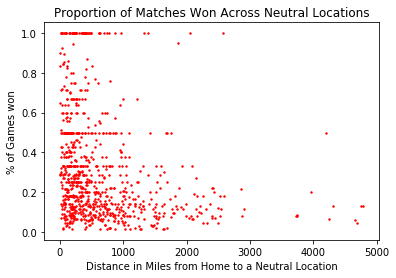

In [347]:
points = get_all_distributions()

In [336]:
props = []

for list_coords in points:
    try:
        for coord in list_coords:
            props += [coord]
    except:
        continue

In [337]:
distances, games_won = zip(*props)

In [338]:
distances = np.array(distances)
games_won = np.array(games_won)

In [339]:
games_won_log = np.log(games_won)

In [340]:
distances_log = np.log(distances)

In [343]:
import scipy.stats as stats

In [409]:
def plot_distance_v2(team_name):
    
    dict_final = {}

    series = dict_win_rates[team_name]
    hc = get_home_coords(team_name)
    
    if type(get_coords(hc)) == int:
        return
         
    for city in series.index:
        coordinates = get_coords(city)
        if type(coordinates) == int:
            continue
        else:
            dict_final[haversine_new(get_coords(hc), get_coords(city))] = series[city]
            
    plt.scatter(list(dict_final.keys()), list(dict_final.values()), c = 'red',s = 2)
    l[0] = l[0] + len(list(dict_final.keys()))
    
    plt.title('Proportion of Matches Won Across Neutral Locations')
    plt.xlabel('Distance in Miles from Home to a Neutral Location')
    plt.ylabel('% of Games won')
    plt.savefig('./aggregated/Aggregated.jpg', dpi = 200)
    
    return list(dict_final.items())

In [410]:
import numpy as np
plt.title('Number of Neutral Locations Visited')
plt.hist(list_number)
plt.savefig('neutral.jpg', dpi = 1000)
plt.clf()
sns.violinplot(x = list_number, inner = 'quartile')
plt.savefig('neutral_violin.jpg', dpi = 1000)
plt.clf()

<Figure size 432x288 with 0 Axes>

In [412]:
def haversine_new(coord1, coord2):
    
    lat1, lon1 = coord1
    lat2, lon2 = coord2
      
    # distance between latitudes 
    # and longitudes 
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
  
    # convert to radians 
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
  
    # apply formulae 
    a = (pow(math.sin(dLat / 2), 2) + 
         pow(math.sin(dLon / 2), 2) * 
             math.cos(lat1) * math.cos(lat2)); 
    rad = 3958.8
    c = 2 * math.asin(math.sqrt(a)) 
    return rad * c 

In [413]:
dict_times = {}

for team in unique_teams:    
    df_team_all = WGameCities[(WGameCities['WTeamID'] == team) | (WGameCities['LTeamID'] == team)]
    df_team_all = df_team_all[df_team_all['Home'] == 'N']
    df_team_all['City_State']  = df_team_all['City']+'@'+ df_team_all['State']
    df_team_all = df_team_all.groupby('City_State').count()
    df_team_all = df_team_all[df_team_all['Season'] > 1]
    dict_times[team] = list(df_team_all.index)

In [414]:
dict_non_zeros = {}
dict_trials = {}


for city in unique_teams:
    city_df = WGameCities[WGameCities['WTeamID'] == city]
    post_proc = city_df.copy()
    post_proc['City_State'] = post_proc['City']+'@'+post_proc['State']
    
    city_neutral_win_rate = post_proc[city_df['Home'] == 'N']['City_State'].value_counts(normalize = True)
    city_neutral_win_counts = post_proc[city_df['Home'] == 'N']['City_State'].value_counts()
    
    
    data_to_filter = pd.DataFrame(city_neutral_win_counts)
    data_to_filter = data_to_filter[data_to_filter.index.isin(dict_times[city])]
    
    city_neutral_win_rate = data_to_filter['City_State'].apply(lambda val: float(val)/data_to_filter['City_State'].sum())
    
    dict_win_rates[city] = city_neutral_win_rate
    dict_trials[city] = city_neutral_win_counts

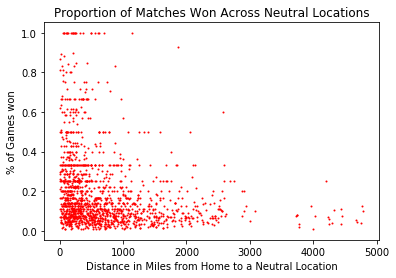

In [415]:
points = get_all_distributions()

In [416]:
props = []

for list_coords in points:
    try:
        for coord in list_coords:
            props += [coord]
    except:
        continue
        
distances, games_won = zip(*props)

stats.spearmanr(distances, games_won)

SpearmanrResult(correlation=-0.31255920249601032, pvalue=3.7935198484562897e-35)

In [96]:
dict_trial = {}

for city in unique_teams:   
    city_df = WGameCities[WGameCities['WTeamID'] == city]
    post_proc = city_df.copy()
    post_proc['City_State'] = post_proc['City']+'@'+post_proc['State']
    city_neutral_win_rate = post_proc[city_df['Home'] == 'N']['City_State'].value_counts()
    dict_trial[city] = city_neutral_win_rate

In [ ]:
for team in unique_teams:    
    dictionary = dict_win_rates[team]
    df = pd.Series(dictionary).to_frame()
    df = df.rename(columns = {'City_State':'Prop_Wins'})
    try:
        plt.figure(figsize=(20,10))
        df.reset_index().rename(columns = {'index': 'City@State'}).plot(kind='bar', x = 'City@State', y = 'Prop_Wins')
        plt.title('Win Rate at Neutral Locations for' + ' ' + team)
        plt.tight_layout()
        plt.savefig('./props/' + team + '.jpg', dpi = 200)
    except:
        continue

In [279]:
WNCAATourneyDetailedResults.groupby('Season').count()

DayNum  WTeamID  WScore  LTeamID  LScore  WLoc  NumOT  WFGM  WFGA  \
Season                                                                      
2010        63       63      63       63      63    63     63    63    63   
2011        63       63      63       63      63    63     63    63    63   
2012        63       63      63       63      63    63     63    63    63   
2013        63       63      63       63      63    63     63    63    63   
2014        63       63      63       63      63    63     63    63    63   
2015        63       63      63       63      63    63     63    63    63   
2016        63       63      63       63      63    63     63    63    63   
2017        63       63      63       63      63    63     63    63    63   
2018        63       63      63       63      63    63     63    63    63   

        WFGM3  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
Season         ...                                                           
2010       63  ...     63    63    63   63   63    63   63    63    63   63  
2011       63  ...     63    63    63   63   63    63   63    63    63   63  
2012       63  ...     63    63    63   63   63    63   63    63    63   63  
2013       63  ...     63    63    63   63   63    63   63    63    63   63  
2014       63  ...     63    63    63   63   63    63   63    63    63   63  
2015       63  ...     63    63    63   63   63    63   63    63    63   63  
2016       63  ...     63    63    63   63   63    63   63    63    63   63  
2017       63  ...     63    63    63   63   63    63   63    63    63   63  
2018       63  ...     63    63    63   63   63    63   63    63    63   63  

[9 rows x 33 columns]

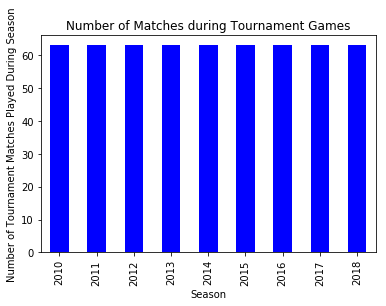

In [297]:
WNCAATourneyDetailedResults.groupby('Season').count()['DayNum'].plot(kind = 'bar', color = 'blue')
plt.title('Number of Matches during Tournament Games')
plt.ylabel('Number of Tournament Matches Played During Season')
plt.savefig('Number of Matches By Season.jpg', dpi = 1000)

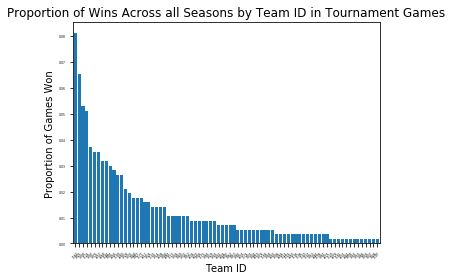

In [369]:
plt.rcParams['xtick.labelsize'] = 3
plt.rcParams['ytick.labelsize'] = 3
plot = WNCAATourneyDetailedResults['WTeamID'].value_counts(normalize = True).plot(kind = 'bar', align = 'center', width = 0.8)
plt.xticks(rotation=45)
plt.title('Proportion of Wins Across all Seasons by Team ID in Tournament Games')
plt.xlabel('Team ID')
plt.ylabel('Proportion of Games Won')
plt.tight_layout()
plt.savefig('by_team.png', dpi = 1000)

In [358]:
WTeams[WTeams.TeamName.index.isin([3163, 3107])]

TeamName
TeamID             
3107      Albany NY
3163    Connecticut

In [380]:
grouped_regular_by_season =WRegularSeasonDetailedResults.groupby('Season')
grouped_tourney_by_season = WNCAATourneyDetailedResults.groupby('Season')
keys =WRegularSeasonDetailedResults.Season.unique()

In [382]:
list_teams_in_both = []

for key in keys:
    df_tourney = grouped_tourney_by_season.get_group(key)
    teams_in_tourney = df_tourney.WTeamID.unique()
    list_teams_in_both += list(teams_in_tourney)    

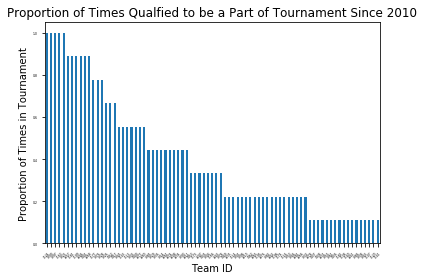

In [404]:
from collections import Counter

series = pd.Series(dict(Counter(list_teams_in_both)))
series = series/len(keys)
series = series.sort_values(ascending = False).plot(kind = 'bar')

plt.xticks(rotation=45)
plt.title('Proportion of Times Qualfied to be a Part of Tournament Since 2010')
plt.xlabel('Team ID')
plt.ylabel('Proportion of Times in Tournament')
plt.tight_layout()
plt.savefig('by_team.png', dpi = 1000)

In [393]:
2018-2010

8

In [405]:
WTeams[WTeams.TeamName.index.isin([3124, 3390, 3397, 3163, 3323])]

TeamName
TeamID             
3124         Baylor
3163    Connecticut
3323     Notre Dame
3390       Stanford
3397      Tennessee

In [413]:
WNCAATourneySeeds

Season Seed  TeamID
0       1998  W01    3330
1       1998  W02    3163
2       1998  W03    3112
3       1998  W04    3301
4       1998  W05    3272
5       1998  W06    3438
6       1998  W07    3208
7       1998  W08    3307
8       1998  W09    3304
9       1998  W10    3203
10      1998  W11    3374
11      1998  W12    3464
12      1998  W13    3263
13      1998  W14    3365
14      1998  W15    3193
15      1998  W16    3384
16      1998  X01    3403
17      1998  X02    3104
18      1998  X03    3256
19      1998  X04    3345
20      1998  X05    3179
21      1998  X06    3155
22      1998  X07    3417
23      1998  X08    3283
24      1998  X09    3323
25      1998  X10    3276
26      1998  X11    3274
27      1998  X12    3161
28      1998  X13    3449
29      1998  X14    3221
...      ...  ...     ...
1314    2018  Y03    3417
1315    2018  Y04    3301
1316    2018  Y05    3268
1317    2018  Y06    3234
1318    2018  Y07    3113
1319    2018  Y08    3393
1320    2018  Y09    3329
1321    2018  Y10    3304
1322    2018  Y11    3166
1323    2018  Y12    3343
1324    2018  Y13    3189
1325    2018  Y14    3110
1326    2018  Y15    3263
1327    2018  Y16    3311
1328    2018  Z01    3257
1329    2018  Z02    3124
1330    2018  Z03    3397
1331    2018  Z04    3390
1332    2018  Z05    3281
1333    2018  Z06    3333
1334    2018  Z07    3276
1335    2018  Z08    3266
1336    2018  Z09    3173
1337    2018  Z10    3294
1338    2018  Z11    3443
1339    2018  Z12    3195
1340    2018  Z13    3211
1341    2018  Z14    3251
1342    2018  Z15    3212
1343    2018  Z16    3129

[1344 rows x 3 columns]

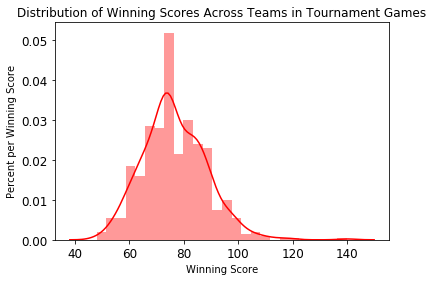

In [429]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#WRegularSeasonDetailedResults['WScore'].hist()
sns.distplot(WNCAATourneyDetailedResults['WScore'], color='red')
plt.title('Distribution of Winning Scores Across Teams in Tournament Games')
plt.xlabel('Winning Score')
plt.ylabel('Percent per Winning Score')
plt.savefig('tournament.jpg', dpi = 1000)

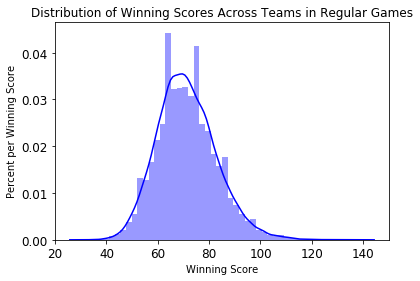

In [431]:
sns.distplot(WRegularSeasonDetailedResults['WScore'], color='blue')
plt.title('Distribution of Winning Scores Across Teams in Regular Games')
plt.xlabel('Winning Score')
plt.ylabel('Percent per Winning Score')
plt.savefig('regular.jpg', dpi = 1000)

In [433]:
stats.skew(WRegularSeasonDetailedResults['WScore'].values)

0.4488770616837882

In [436]:
stats.kurtosis(WRegularSeasonCompactResults['WScore'].values, fisher=False)

3.421052935339531

In [437]:
stats.skew(WNCAATourneyDetailedResults['WScore'].values)

0.5725054941627369

In [438]:
stats.kurtosis(WNCAATourneyDetailedResults['WScore'].values, fisher=False)

4.395651962037364

In [439]:
WRegularSeasonDetailedResults['WScore'].values.mean()

71.2811056924604

In [440]:
WNCAATourneyDetailedResults['WScore'].values.mean()

76.53615520282187

In [443]:
stats.ks_2samp(WRegularSeasonDetailedResults['WScore'].values, WNCAATourneyDetailedResults['WScore'].values)

Ks_2sampResult(statistic=0.21733032769097965, pvalue=1.196697625790175e-23)

In [114]:
WGameCities.head()

Season  DayNum         WTeamID         LTeamID   CRType            City  \
0    2010      11           Akron           IUPUI  Regular           akron   
1    2010      11         Alabama  Tennessee Tech  Regular  corpus christi   
2    2010      11   American Univ          Howard  Regular      washington   
3    2010      11  Appalachian St        Marshall  Regular      huntington   
4    2010      11            Army          Wagner  Regular      west point   

  State Home  
0    OH    H  
1    TX    N  
2    DC    H  
3    WV    A  
4    NY    H

In [124]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

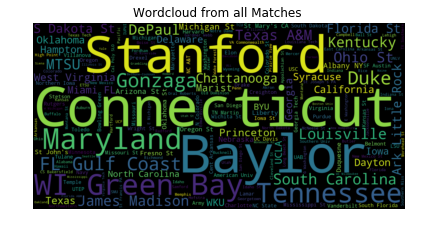

In [164]:
wordcloud = WordCloud(width=1600, height=800)
wordcloud.generate_from_frequencies(frequencies=dict(merged.WTeamID.value_counts(normalize = True)*100))

plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud from all Matches ')
plt.axis("off")
plt.tight_layout()
plt.savefig('Words_All.jpg', dpi = 1000)

In [170]:
grouped_by_region = with_regions.groupby('Region')

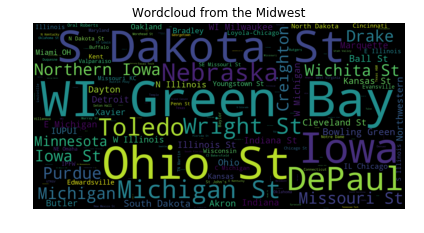

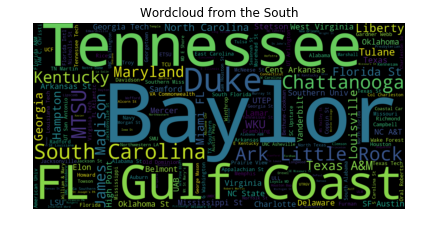

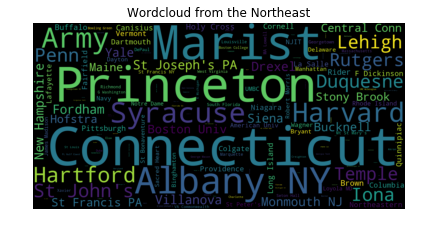

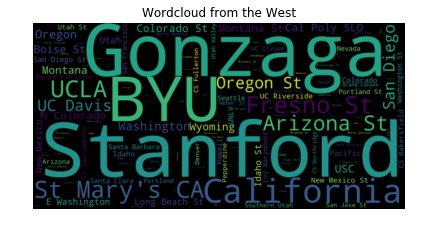

In [175]:
for data_region in regions:
    data_frame_region = grouped_by_region.get_group(data_region)
    wordcloud = WordCloud(width=1600, height=800)
    wordcloud.generate_from_frequencies(frequencies=dict(data_frame_region.WTeamID.value_counts(normalize = True)*100))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title('Wordcloud from the' + ' ' + str(data_region))
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('Words_' + data_region + '.jpg', dpi = 1000)
    plt.show()
    

In [82]:
with_regions.head()

Season  DayNum WTeamID        LTeamID   CRType   City State      lat  \
0    2010      11   Akron          IUPUI  Regular  akron    OH  41.0802   
1    2010      30   Akron           IPFW  Regular  akron    OH  41.0802   
2    2010      33   Akron  Youngstown St  Regular  akron    OH  41.0802   
3    2010      56  Temple          Akron  Regular  akron    OH  41.0802   
4    2010      68   Akron        Buffalo  Regular  akron    OH  41.0802   

       lng   Region  prop_matches  
0 -81.5219  Midwest      0.190801  
1 -81.5219  Midwest      0.190801  
2 -81.5219  Midwest      0.190801  
3 -81.5219  Midwest      0.190801  
4 -81.5219  Midwest      0.190801

In [81]:
post_proc.head()

Season  DayNum    WTeamID      LTeamID   CRType       City State Home  \
22981    2014      68  MA Lowell         UMBC  Regular  baltimore    MD    A   
23842    2014      87  MA Lowell   Binghamton  Regular     vestal    NY    A   
24276    2014      96  MA Lowell         UMBC  Regular     lowell    MA    H   
24418    2014     100  MA Lowell      Vermont  Regular     lowell    MA    H   
26705    2015      27  MA Lowell  F Dickinson  Regular     lowell    MA    H   

         City_State  
22981  baltimore@MD  
23842     vestal@NY  
24276     lowell@MA  
24418     lowell@MA  
26705     lowell@MA

In [76]:
dict_win_rates['Purdue']

indianapolis@IN       0.310345
hoffman estates@IL    0.137931
cancun@MX             0.137931
fort myers@FL         0.068966
east lansing@MI       0.068966
st. thomas@VI         0.068966
louisville@KY         0.034483
storrs@CT             0.034483
puerto vallarta@MX    0.034483
notre dame@IN         0.034483
freeport@BA           0.034483
honolulu@HI           0.034483
Name: City_State, dtype: float64

In [77]:
import geopandas as gpd

In [78]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [79]:
data_team = dict_win_rates['Purdue'].to_frame().reset_index().rename(columns = {'index': 'Coordinates', 'City_State': 'Prop_wins'})
data_team['Coordinates'] = data_team['Coordinates'].apply(lambda val:get_coords(val))
data_team = data_team[data_team['Coordinates'] != -100]
data_team['Coordinates'] = data_team['Coordinates'].apply(lambda val: Point(val[::-1]))
gdf = geopandas.GeoDataFrame(geometry = data_team['Coordinates'])
gdf['Prop_wins'] = data_team['Prop_wins']

In [80]:
gdf

geometry  Prop_wins
0   POINT (-86.14579999999999 39.7771)   0.310345
1             POINT (-88.1463 42.0638)   0.137931
3             POINT (-81.8306 26.6197)   0.068966
4             POINT (-84.4834 42.7483)   0.068966
6   POINT (-85.64879999999999 38.1662)   0.034483
7             POINT (-72.2552 41.8045)   0.034483
11            POINT (-157.846 21.3293)   0.034483